# Task-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



In [2]:
columns_list = ['datetime_utc','_conds','_dewptm','_fog','_hail','_heatindexm','_hum','_precipm','_pressurem','_rain','_snow','_tempm','_thunder','_tornado','_vism','_wdird','_wdire','_wgustm','_windchillm','_wspdm']
Data = pd.read_csv('Weather_data.csv',names=columns_list)
Data = Data.drop([0])

C:\Users\Nishanth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data.shape

(98913, 20)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98913 entries, 1 to 98913
Data columns (total 20 columns):
datetime_utc    98913 non-null object
_conds          98845 non-null object
_dewptm         98294 non-null object
_fog            98913 non-null object
_hail           98913 non-null object
_heatindexm     29111 non-null object
_hum            98160 non-null object
_precipm        0 non-null object
_pressurem      98682 non-null object
_rain           98913 non-null object
_snow           98913 non-null object
_tempm          98244 non-null object
_thunder        98913 non-null object
_tornado        98913 non-null object
_vism           94497 non-null object
_wdird          84533 non-null object
_wdire          84533 non-null object
_wgustm         1063 non-null object
_windchillm     573 non-null object
_wspdm          96560 non-null object
dtypes: object(20)
memory usage: 15.8+ MB


#### since '_precipm' has all NaN values. so it adds nothing to us. so we drop this column

In [5]:
Data = Data.drop(['_precipm'], axis=1)

In [6]:
Data = Data.reset_index()
Data.head()

,index,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1,19961101-11:00,Smoke,9,0,0,NaN,27,1010,0,0,30,0,0,5,280,West,NaN,NaN,7.4
1,2,19961101-12:00,Smoke,10,0,0,NaN,32,-9999,0,0,28,0,0,NaN,0,North,NaN,NaN,NaN
2,3,19961101-13:00,Smoke,11,0,0,NaN,44,-9999,0,0,24,0,0,NaN,0,North,NaN,NaN,NaN
3,4,19961101-14:00,Smoke,10,0,0,NaN,41,1010,0,0,24,0,0,2,0,North,NaN,NaN,NaN
4,5,19961101-16:00,Smoke,11,0,0,NaN,47,1011,0,0,23,0,0,1.2,0,North,NaN,NaN,0


# Feature Engineering

#### Deriving N th day feature. for N=1 for a given data point we take previous day temperature as new feature. for N=2 we take temperature of last 2nd day feature as new feature and so on

In [7]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements


In [8]:
for feature in ['_pressurem','_dewptm','_hum','_rain','_snow']:
        for N in range(1, 4):
            derive_nth_day_feature(Data, feature, N)


In [9]:
Data.head()

,index,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,...,_dewptm_3,_hum_1,_hum_2,_hum_3,_rain_1,_rain_2,_rain_3,_snow_1,_snow_2,_snow_3
0,1,19961101-11:00,Smoke,9,0,0,NaN,27,1010,0,...,None,None,None,None,None,None,None,None,None,None
1,2,19961101-12:00,Smoke,10,0,0,NaN,32,-9999,0,...,None,27,None,None,0,None,None,0,None,None
2,3,19961101-13:00,Smoke,11,0,0,NaN,44,-9999,0,...,None,32,27,None,0,0,None,0,0,None
3,4,19961101-14:00,Smoke,10,0,0,NaN,41,1010,0,...,9,44,32,27,0,0,0,0,0,0
4,5,19961101-16:00,Smoke,11,0,0,NaN,47,1011,0,...,10,41,44,32,0,0,0,0,0,0


In [11]:
Data['_wdird'] = pd.to_numeric(Data['_wdird'])
Data['_vism'] = pd.to_numeric(Data['_vism'])
Data['_tempm'] = pd.to_numeric(Data['_tempm'])
Data['_pressurem'] = pd.to_numeric(Data['_pressurem'])
Data['_hum'] = pd.to_numeric(Data['_hum'])
Data['_heatindexm'] = pd.to_numeric(Data['_heatindexm'])
Data['_dewptm'] = pd.to_numeric(Data['_dewptm'])
Data['_fog'] = pd.to_numeric(Data['_fog'])
Data['_hail'] = pd.to_numeric(Data['_hail'])
Data['_rain'] = pd.to_numeric(Data['_rain'])
Data['_pressurem_1'] = pd.to_numeric(Data['_pressurem_1'])
Data['_pressurem_2'] = pd.to_numeric(Data['_pressurem_2'])
Data['_pressurem_3'] = pd.to_numeric(Data['_pressurem_3'])
Data['_dewptm_1'] = pd.to_numeric(Data['_dewptm_1'])
Data['_dewptm_2'] = pd.to_numeric(Data['_dewptm_2'])
Data['_dewptm_3'] = pd.to_numeric(Data['_dewptm_3'])
Data['_hum_1'] = pd.to_numeric(Data['_hum_1'])
Data['_hum_2'] = pd.to_numeric(Data['_hum_2'])
Data['_hum_3'] = pd.to_numeric(Data['_hum_3'])
Data['_snow_1'] = pd.to_numeric(Data['_snow_1'])
Data['_snow_2'] = pd.to_numeric(Data['_snow_2'])
Data['_snow_3'] = pd.to_numeric(Data['_snow_2'])
Data['_rain_1'] = pd.to_numeric(Data['_rain_1'])
Data['_rain_2'] = pd.to_numeric(Data['_rain_2'])
Data['_rain_3'] = pd.to_numeric(Data['_rain_3'])


# Exploratory Data Analysis

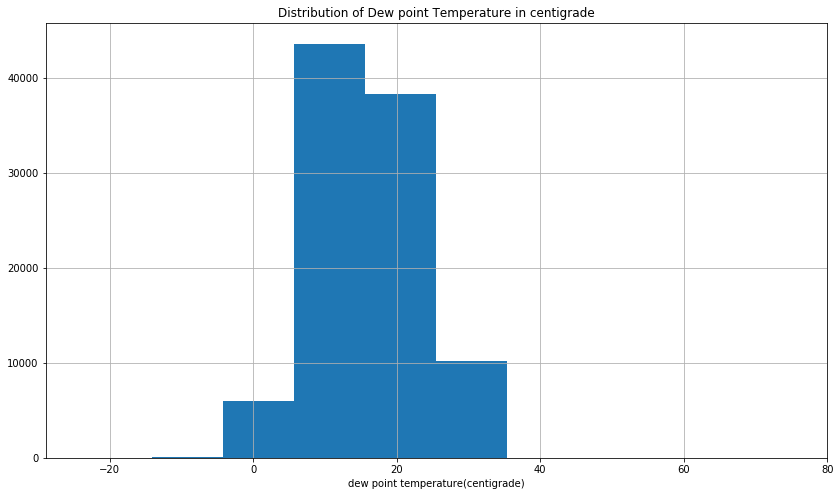

In [12]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._dewptm.hist()
plt.title('Distribution of Dew point Temperature in centigrade')
plt.xlabel('dew point temperature(centigrade)')
plt.show()


#### Dew Point Temperature has range from -75 to 125 with most of the values range from -4 to 35

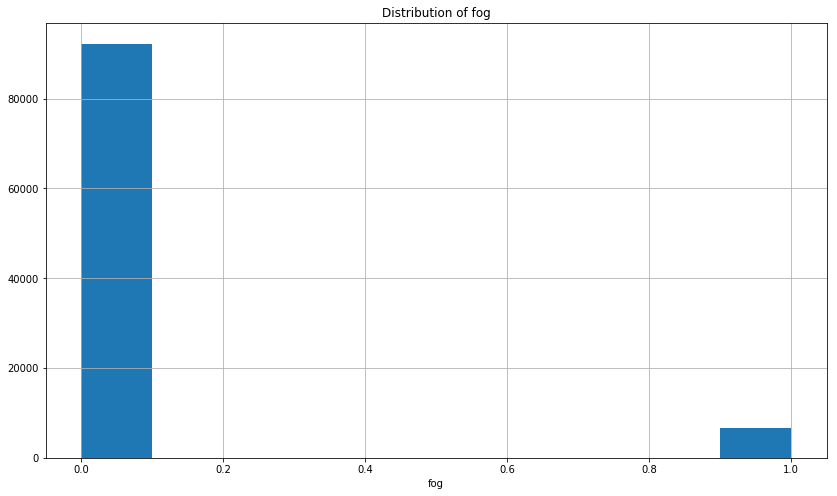

In [13]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._fog.hist()
plt.title('Distribution of fog')
plt.xlabel('fog')
plt.show()


#### fog takes in values 0 and 1 with most of them are 0 while a small portion of them are 1

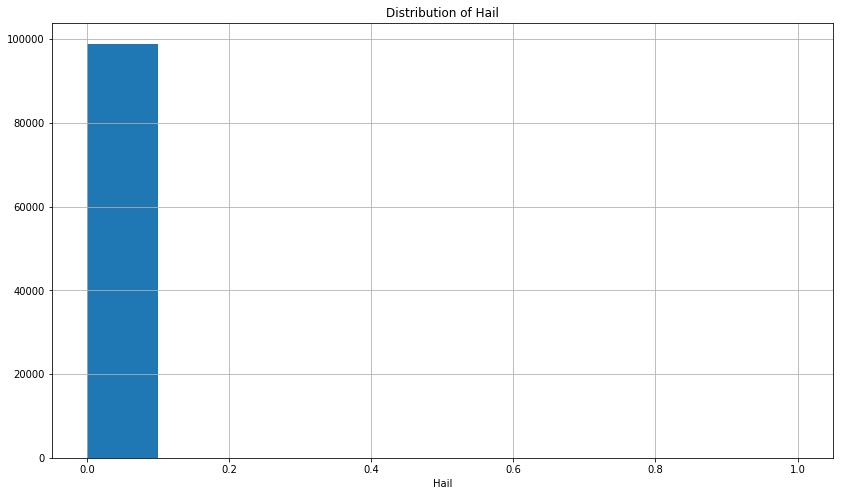

In [14]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._hail.hist()
plt.title('Distribution of Hail')
plt.xlabel('Hail')
plt.show()


#### All most all the values of Hail are zero with only 13 points having value one

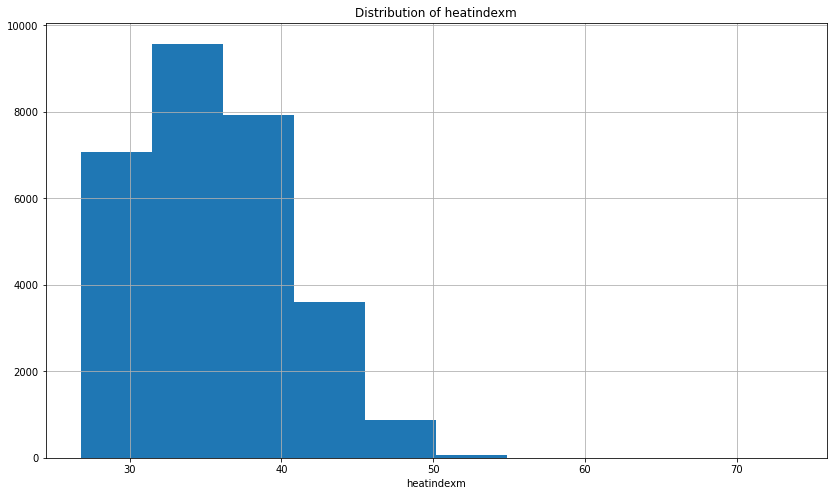

In [15]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._heatindexm.hist()
plt.title('Distribution of heatindexm')
plt.xlabel('heatindexm')
plt.show()


#### heatindex have range from 20 to 50

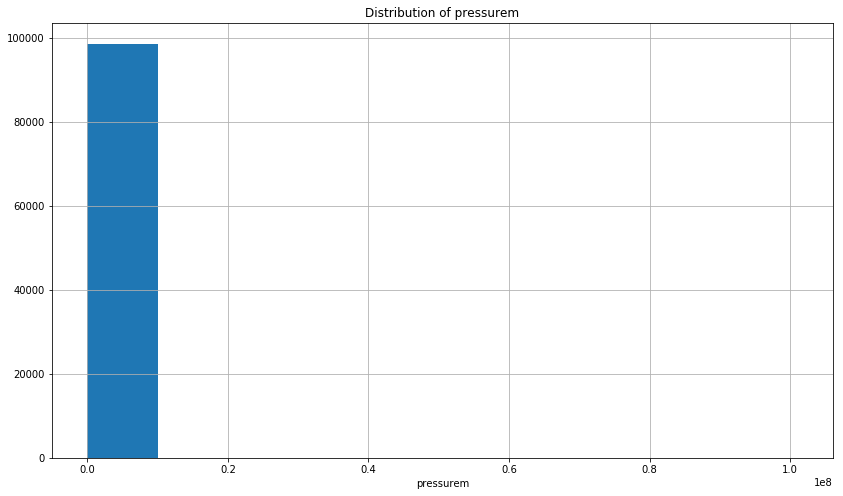

In [16]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._pressurem.hist()
plt.title('Distribution of pressurem')
plt.xlabel('pressurem')
plt.show()


#### almost all points of pressure are in and around zero

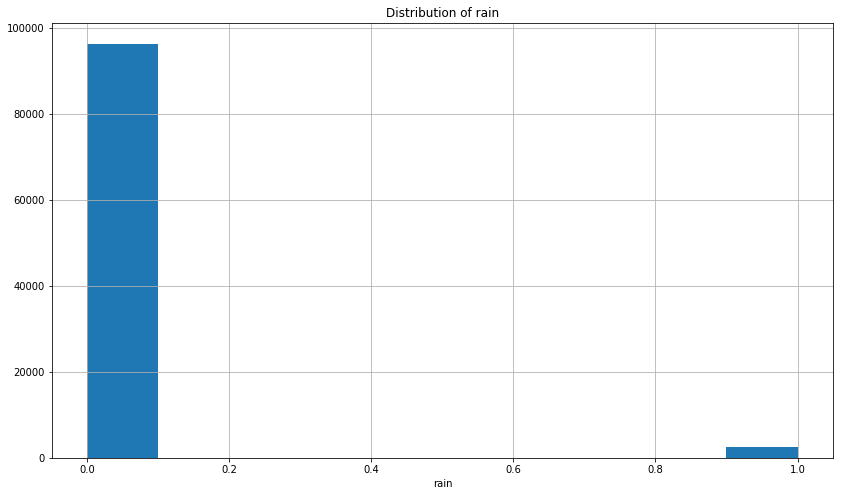

In [17]:
plt.rcParams['figure.figsize'] = [14, 8]
Data._rain.hist()
plt.title('Distribution of rain')
plt.xlabel('rain')
plt.show()

#### most of them are zero with small portion of values having one

### Handling missing values

In [18]:
Data['_wdird'] = Data['_wdird'].fillna(Data['_wdird'].mean())
Data['_vism'] = Data['_vism'].fillna(Data['_vism'].mean())
Data['_tempm'] = Data['_tempm'].fillna(Data['_tempm'].mean())
Data['_pressurem'] = Data['_pressurem'].fillna(Data['_pressurem'].mean())
Data['_hum'] = Data['_hum'].fillna(Data['_hum'].mean())
Data['_heatindexm'] = Data['_heatindexm'].fillna(Data['_heatindexm'].mean())
Data['_dewptm'] = Data['_dewptm'].fillna(Data['_dewptm'].mean())
Data['_pressurem_1'] = Data['_pressurem_1'].fillna(Data['_pressurem_1'].mean())
Data['_pressurem_2'] = Data['_pressurem_2'].fillna(Data['_pressurem_2'].mean())
Data['_pressurem_3'] = Data['_pressurem_3'].fillna(Data['_pressurem_3'].mean())
Data['_dewptm_1'] = Data['_dewptm_1'].fillna(Data['_dewptm_1'].mean())
Data['_dewptm_2'] = Data['_dewptm_2'].fillna(Data['_dewptm_2'].mean())
Data['_dewptm_3'] = Data['_dewptm_3'].fillna(Data['_dewptm_3'].mean())
Data['_hum_1'] = Data['_hum_1'].fillna(Data['_hum_1'].mean())
Data['_hum_2'] = Data['_hum_2'].fillna(Data['_hum_2'].mean())
Data['_hum_3'] = Data['_hum_3'].fillna(Data['_hum_3'].mean())
Data['_snow_1'] = Data['_snow_1'].fillna(Data['_snow_1'].mean())
Data['_snow_2'] = Data['_snow_2'].fillna(Data['_snow_2'].mean())
Data['_snow_3'] = Data['_snow_3'].fillna(Data['_snow_3'].mean())
Data['_rain_1'] = Data['_rain_1'].fillna(Data['_rain_1'].mean())
Data['_rain_2'] = Data['_rain_2'].fillna(Data['_rain_2'].mean())
Data['_rain_3'] = Data['_rain_3'].fillna(Data['_rain_3'].mean())


#### since above features have only few missing values i tried to replace with mean

In [19]:
Data['_wgustm'] = Data['_wgustm'].fillna(0)
Data['_windchillm'] = Data['_windchillm'].fillna(0)
Data['_wspdm'] = Data['_wspdm'].fillna(0)


#### since above features have large amount of missing values i tried to replace with zero

### one hot encoding categorical variables

In [20]:
Data = pd.get_dummies(Data, columns=['_conds'])
Data = pd.get_dummies(Data, columns=['_wdire'])


### preparing data for modeling

In [21]:
y = Data['_tempm']
Data = Data.drop(['_tempm'], axis=1)
Data = Data.drop(['datetime_utc'], axis=1)
Data = Data.drop(['index'],axis=1)

#### splitting first 80% to train and next 20% to test

In [22]:
X_train = Data[0:79130]
X_test = Data[79130:98913]

In [23]:
y_train = y[0:79130]
y_test = y[79130:98913]

#### linear regression

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)


In [25]:
print("Mean Absolute Error: %.2f " % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f" % median_absolute_error(y_test, prediction))
print("The Mean squared Error: %.2f degrees" % mean_squared_error(y_test, prediction))


Mean Absolute Error: 11.46 
The Median Absolute Error: 1.46
The Mean squared Error: 1232206.05 degrees


#### KNN Regressor

In [26]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
prediction = neigh.predict(X_test)


In [27]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, prediction))
print("Median Absolute Error: %.2f" % median_absolute_error(y_test, prediction))
print("Mean squared Error: %.2f" % mean_squared_error(y_test, prediction))


Mean Absolute Error: 1.56
Median Absolute Error: 1.20
Mean squared Error: 4.94


#### DecisionTree Regressor

In [28]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)


In [29]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f" % median_absolute_error(y_test, prediction))
print("The Mean squared Error: %.2f" % mean_squared_error(y_test, prediction))


Mean Absolute Error: 0.59
The Median Absolute Error: 0.00
The Mean squared Error: 1.60


#### Random Forest Regressor

In [30]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)


C:\Users\Nishanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, prediction))
print("Median Absolute Error: %.2f" % median_absolute_error(y_test, prediction))
print("Mean squared Error: %.2f" % mean_squared_error(y_test, prediction))


Mean Absolute Error: 0.53
Median Absolute Error: 0.30
Mean squared Error: 1.00


## Since MSE is minimum in Random Forest Regressor. Use RandomForestRegressor to test data

### yes Deep learning techniques can give more accurate predictions if hyper-tuned properly

# Task -2

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


C:\Users\Nishanth\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
columns_list = ['Timestamp','SuctionPressure','SuctionTemperature','TotalFlow','Speed','BypassValvePosition','DischargePressure','DischargeTemperature','RunStatus']
data = pd.read_csv('Expander_data.csv',names=columns_list)
data = data.drop([0])

C:\Users\Nishanth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(296450, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296450 entries, 1 to 296450
Data columns (total 9 columns):
Timestamp               296450 non-null object
SuctionPressure         296450 non-null object
SuctionTemperature      296450 non-null object
TotalFlow               296450 non-null object
Speed                   296450 non-null object
BypassValvePosition     296450 non-null object
DischargePressure       296450 non-null object
DischargeTemperature    296450 non-null object
RunStatus               0 non-null object
dtypes: object(9)
memory usage: 22.6+ MB


#### since RunStatus has all null values it adds no value. so we are dropping it

In [5]:
data = data.drop(['RunStatus'], axis=1)

In [6]:
data['SuctionPressure'] = pd.to_numeric(data['SuctionPressure'])
data['SuctionTemperature'] = pd.to_numeric(data['SuctionTemperature'])
data['TotalFlow'] = pd.to_numeric(data['TotalFlow'])
data['Speed'] = pd.to_numeric(data['Speed'])
data['BypassValvePosition'] = pd.to_numeric(data['BypassValvePosition'])
data['DischargePressure'] = pd.to_numeric(data['DischargePressure'])
data['DischargeTemperature'] = pd.to_numeric(data['DischargeTemperature'])


In [7]:
y = data['SuctionPressure']
data = data.drop(['SuctionPressure'], axis=1)
data = data.drop(['Timestamp'], axis=1)

In [8]:
data.shape

(296450, 6)

### preparing data for modelling

In [9]:
X_train = data[0:189728]
X_val = data[189728:237160]
X_test = data[237160:296450]

In [10]:
y_train = y[0:189728]
y_val = y[189728:237160]
y_test = y[237160:296450]

#### linear regression

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)


In [12]:
rmse = sqrt(mean_squared_error(y_test, prediction))
print(rmse)

3.850329760713459


#### RandomForest Regressor

In [13]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)


C:\Users\Nishanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
rmse = sqrt(mean_squared_error(y_test, prediction))
print(rmse)

5.184122591677596


#### KNN Regressor

In [15]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
prediction = neigh.predict(X_test)


In [16]:
rmse = sqrt(mean_squared_error(y_test, prediction))
print(rmse)

3.9182460205297636


#### DecisionTree Regressor

In [17]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)


In [18]:
rmse = sqrt(mean_squared_error(y_test, prediction))
print(rmse)

5.9046984531045155


### Two-layered NN with 50 nodes in each layer

In [19]:
feature_cols = [tf.feature_column.numeric_column(col) for col in data.columns]


In [22]:
regressor = tf.estimator.DNNRegressor(feature_columns = feature_cols,hidden_units=[50, 50], model_dir='tf_wx_model2')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B9CC715BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,y=y,num_epochs=num_epochs,shuffle=shuffle,batch_size=batch_size)


In [28]:
evaluations = []
STEPS = 400
for i in range(1000):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val, y_val, num_epochs=100,shuffle=False)))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 110783.61, step = 40001
INFO:tensorflow:global_step/sec: 72.7708
INFO:tensorflow:loss = 3894.3767, step = 40101 (1.374 sec)
INFO:tensorflow:global_step/sec: 78.3246
INFO:tensorflow:loss = 4113.6455, step = 40201 (1.281 sec)
INFO:tensorflow:global_step/sec: 81.8453
INFO:tensorflow:loss = 3310.7886, step = 40301 (1.225 sec)
INFO:tensorflow:Saving checkpoints for 40400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 4930.5024.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T03:54:10Z
INFO:tensorfl

INFO:tensorflow:Saving checkpoints for 42400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 4226.3145.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T04:06:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-42400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-04:09:05
INFO:tensorflow:Saving dict for global step 42400: average_loss = 415.14215, global_step = 42400, label/mean = 581.3764, loss = 166056.86, prediction/mean = 601.19836
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 42400: tf_wx_model2\model.ckpt-42400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-4240

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-44400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 44400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 72529.945, step = 44401
INFO:tensorflow:global_step/sec: 72.001
INFO:tensorflow:loss = 4294.282, step = 44501 (1.388 sec)
INFO:tensorflow:global_step/sec: 58.4766
INFO:tensorflow:loss = 5053.608, step = 44601 (1.726 sec)
INFO:tensorflow:global_step/sec: 84.6276
INFO:tensorflow:loss = 5105.2334, step = 44701 (1.166 sec)
INFO:tensorflow:Saving checkpoints for 44800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3669.9463.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T04:22:36Z
INFO:tensorflow:

INFO:tensorflow:Saving checkpoints for 46800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3697.2795.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T04:35:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-46800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-04:37:48
INFO:tensorflow:Saving dict for global step 46800: average_loss = 21.674614, global_step = 46800, label/mean = 581.3764, loss = 8669.846, prediction/mean = 580.5721
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 46800: tf_wx_model2\model.ckpt-46800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-46800


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 48800: tf_wx_model2\model.ckpt-48800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-48800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 48800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5758.243, step = 48801
INFO:tensorflow:global_step/sec: 66.2181
INFO:tensorflow:loss = 5260.4004, step = 48901 (1.518 sec)
INFO:tensorflow:global_step/sec: 79.6755
INFO:tensorflow:loss = 6019.3813, step = 49001 (1.263 sec)
INFO:tensorflow:global_step/sec: 75.3557
INFO:tensorflow:loss = 4091.787, step = 49101 (1.316 sec)
INFO:tensorflow:Saving checkpoints for 49200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 4126.857.
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

INFO:tensorflow:global_step/sec: 86.4928
INFO:tensorflow:loss = 4215.9414, step = 51101 (1.172 sec)
INFO:tensorflow:Saving checkpoints for 51200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3757.1968.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T05:02:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-51200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-05:04:40
INFO:tensorflow:Saving dict for global step 51200: average_loss = 217.92545, global_step = 51200, label/mean = 581.3764, loss = 87170.18, prediction/mean = 595.4851
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 51200: tf_wx_model2\model.ckpt-51200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tens

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 53200: tf_wx_model2\model.ckpt-53200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-53200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 53200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 4675.41, step = 53201
INFO:tensorflow:global_step/sec: 72.9475
INFO:tensorflow:loss = 3986.1167, step = 53301 (1.386 sec)
INFO:tensorflow:global_step/sec: 85.2469
INFO:tensorflow:loss = 4093.7378, step = 53401 (1.173 sec)
INFO:tensorflow:global_step/sec: 92.7601
INFO:tensorflow:loss = 4542.247, step = 53501 (1.078 sec)
INFO:tensorflow:Saving checkpoints for 53600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3073.0974.
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

INFO:tensorflow:global_step/sec: 85.3393
INFO:tensorflow:loss = 3893.151, step = 55501 (1.156 sec)
INFO:tensorflow:Saving checkpoints for 55600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3403.5132.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T05:28:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-55600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-05:30:39
INFO:tensorflow:Saving dict for global step 55600: average_loss = 20.022177, global_step = 55600, label/mean = 581.3764, loss = 8008.871, prediction/mean = 582.90344
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 55600: tf_wx_model2\model.ckpt-55600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tens

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 57600: tf_wx_model2\model.ckpt-57600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-57600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 57600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 340892.03, step = 57601
INFO:tensorflow:global_step/sec: 74.802
INFO:tensorflow:loss = 3006.932, step = 57701 (1.351 sec)
INFO:tensorflow:global_step/sec: 80.5611
INFO:tensorflow:loss = 3866.9688, step = 57801 (1.226 sec)
INFO:tensorflow:global_step/sec: 88.2024
INFO:tensorflow:loss = 3476.8252, step = 57901 (1.154 sec)
INFO:tensorflow:Saving checkpoints for 58000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3752.6995.
INFO:tensorflow:Calling model_fn.
INFO:tensorf

INFO:tensorflow:global_step/sec: 87.3765
INFO:tensorflow:loss = 5231.2246, step = 59901 (1.168 sec)
INFO:tensorflow:Saving checkpoints for 60000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3237.104.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T05:54:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-05:56:48
INFO:tensorflow:Saving dict for global step 60000: average_loss = 227.24347, global_step = 60000, label/mean = 581.3764, loss = 90897.39, prediction/mean = 566.86523
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 60000: tf_wx_model2\model.ckpt-60000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tens

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 62000: tf_wx_model2\model.ckpt-62000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-62000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 62000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 269516.6, step = 62001
INFO:tensorflow:global_step/sec: 76.4986
INFO:tensorflow:loss = 3348.6577, step = 62101 (1.323 sec)
INFO:tensorflow:global_step/sec: 80.7454
INFO:tensorflow:loss = 3350.376, step = 62201 (1.230 sec)
INFO:tensorflow:global_step/sec: 89.3474
INFO:tensorflow:loss = 3057.4082, step = 62301 (1.112 sec)
INFO:tensorflow:Saving checkpoints for 62400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2795.6174.
INFO:tensorflow:Calling model_fn.
INFO:tensorf

INFO:tensorflow:global_step/sec: 88.196
INFO:tensorflow:loss = 60639.35, step = 64301 (1.149 sec)
INFO:tensorflow:Saving checkpoints for 64400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2878.3608.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T06:20:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-64400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-06:22:50
INFO:tensorflow:Saving dict for global step 64400: average_loss = 223.84691, global_step = 64400, label/mean = 581.3764, loss = 89538.766, prediction/mean = 595.83704
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 64400: tf_wx_model2\model.ckpt-64400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tens

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 66400: tf_wx_model2\model.ckpt-66400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-66400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 66400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 96001.875, step = 66401
INFO:tensorflow:global_step/sec: 52.8953
INFO:tensorflow:loss = 3160.323, step = 66501 (1.891 sec)
INFO:tensorflow:global_step/sec: 80.2625
INFO:tensorflow:loss = 2943.0815, step = 66601 (1.262 sec)
INFO:tensorflow:global_step/sec: 80.943
INFO:tensorflow:loss = 2862.6855, step = 66701 (1.220 sec)
INFO:tensorflow:Saving checkpoints for 66800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3454.8704.
INFO:tensorflow:Calling model_fn.
INFO:tensorf

INFO:tensorflow:global_step/sec: 93.1708
INFO:tensorflow:loss = 3970.465, step = 68701 (1.073 sec)
INFO:tensorflow:Saving checkpoints for 68800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2890.945.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T06:46:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-68800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-06:48:53
INFO:tensorflow:Saving dict for global step 68800: average_loss = 13.338737, global_step = 68800, label/mean = 581.3764, loss = 5335.4946, prediction/mean = 581.5778
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 68800: tf_wx_model2\model.ckpt-68800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tenso

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 70800: tf_wx_model2\model.ckpt-70800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-70800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 70800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 3673.2368, step = 70801
INFO:tensorflow:global_step/sec: 79.1075
INFO:tensorflow:loss = 1961.7068, step = 70901 (1.264 sec)
INFO:tensorflow:global_step/sec: 84.9364
INFO:tensorflow:loss = 7501.439, step = 71001 (1.193 sec)
INFO:tensorflow:global_step/sec: 87.0261
INFO:tensorflow:loss = 2395.8384, step = 71101 (1.149 sec)
INFO:tensorflow:Saving checkpoints for 71200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2558.6416.
INFO:tensorflow:Calling model_fn.
INFO:tensor

INFO:tensorflow:loss = 2141.8486, step = 73001 (0.569 sec)
INFO:tensorflow:global_step/sec: 175.846
INFO:tensorflow:loss = 2804.4302, step = 73101 (0.569 sec)
INFO:tensorflow:Saving checkpoints for 73200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2302.476.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T07:07:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-73200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-07:08:51
INFO:tensorflow:Saving dict for global step 73200: average_loss = 343.40387, global_step = 73200, label/mean = 581.3764, loss = 137361.55, prediction/mean = 599.59357
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 73200: tf_wx_model2\model.ckpt-73200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling mod

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 75200: tf_wx_model2\model.ckpt-75200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-75200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 75200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 6618.0635, step = 75201
INFO:tensorflow:global_step/sec: 148.47
INFO:tensorflow:loss = 2722.6685, step = 75301 (0.689 sec)
INFO:tensorflow:global_step/sec: 174.275
INFO:tensorflow:loss = 15408.492, step = 75401 (0.574 sec)
INFO:tensorflow:global_step/sec: 172.303
INFO:tensorflow:loss = 2934.7732, step = 75501 (0.565 sec)
INFO:tensorflow:Saving checkpoints for 75600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2963.0908.
INFO:tensorflow:Calling model_fn.
INFO:tensor

INFO:tensorflow:loss = 2884.123, step = 77401 (0.563 sec)
INFO:tensorflow:global_step/sec: 173.135
INFO:tensorflow:loss = 9042.203, step = 77501 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 77600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2496.856.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T07:20:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-77600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-07:21:06
INFO:tensorflow:Saving dict for global step 77600: average_loss = 10.926892, global_step = 77600, label/mean = 581.3764, loss = 4370.757, prediction/mean = 581.7965
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 77600: tf_wx_model2\model.ckpt-77600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_f

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 79600: tf_wx_model2\model.ckpt-79600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-79600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 79600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 97760.9, step = 79601
INFO:tensorflow:global_step/sec: 155.929
INFO:tensorflow:loss = 2343.9253, step = 79701 (0.657 sec)
INFO:tensorflow:global_step/sec: 174.882
INFO:tensorflow:loss = 2693.1035, step = 79801 (0.556 sec)
INFO:tensorflow:global_step/sec: 174.491
INFO:tensorflow:loss = 2600.7883, step = 79901 (0.573 sec)
INFO:tensorflow:Saving checkpoints for 80000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1922.7437.
INFO:tensorflow:Calling model_fn.
INFO:tensorf

INFO:tensorflow:global_step/sec: 173.147
INFO:tensorflow:loss = 13091.332, step = 81901 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 82000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2815.8096.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T07:32:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-82000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-07:33:16
INFO:tensorflow:Saving dict for global step 82000: average_loss = 34.373028, global_step = 82000, label/mean = 581.3764, loss = 13749.211, prediction/mean = 576.4233
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 82000: tf_wx_model2\model.ckpt-82000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:ten

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 84000: tf_wx_model2\model.ckpt-84000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-84000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 84000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 348973.8, step = 84001
INFO:tensorflow:global_step/sec: 152.138
INFO:tensorflow:loss = 2262.2734, step = 84101 (0.657 sec)
INFO:tensorflow:global_step/sec: 179.531
INFO:tensorflow:loss = 2290.7466, step = 84201 (0.557 sec)
INFO:tensorflow:global_step/sec: 181.138
INFO:tensorflow:loss = 2180.2246, step = 84301 (0.568 sec)
INFO:tensorflow:Saving checkpoints for 84400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2057.6.
INFO:tensorflow:Calling model_fn.
INFO:tensorflo

INFO:tensorflow:loss = 2063.6123, step = 86201 (1.215 sec)
INFO:tensorflow:global_step/sec: 94.1764
INFO:tensorflow:loss = 2654.3281, step = 86301 (1.062 sec)
INFO:tensorflow:Saving checkpoints for 86400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1641.2777.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T07:45:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-86400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-07:48:13
INFO:tensorflow:Saving dict for global step 86400: average_loss = 12.36023, global_step = 86400, label/mean = 581.3764, loss = 4944.0923, prediction/mean = 579.4368
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 86400: tf_wx_model2\model.ckpt-86400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling mode

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 88400: tf_wx_model2\model.ckpt-88400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-88400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 88400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 92155.445, step = 88401
INFO:tensorflow:global_step/sec: 67.6695
INFO:tensorflow:loss = 1860.1277, step = 88501 (1.477 sec)
INFO:tensorflow:global_step/sec: 87.6015
INFO:tensorflow:loss = 1907.4037, step = 88601 (1.157 sec)
INFO:tensorflow:global_step/sec: 83.4247
INFO:tensorflow:loss = 2480.4814, step = 88701 (1.183 sec)
INFO:tensorflow:Saving checkpoints for 88800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2475.496.
INFO:tensorflow:Calling model_fn.
INFO:tensor

INFO:tensorflow:global_step/sec: 57.3706
INFO:tensorflow:loss = 1732.7627, step = 90701 (1.727 sec)
INFO:tensorflow:Saving checkpoints for 90800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1910.8186.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T08:13:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-90800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-08:15:30
INFO:tensorflow:Saving dict for global step 90800: average_loss = 75.416306, global_step = 90800, label/mean = 581.3764, loss = 30166.523, prediction/mean = 589.6085
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 90800: tf_wx_model2\model.ckpt-90800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:ten

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 92800: tf_wx_model2\model.ckpt-92800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-92800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 92800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 4641.918, step = 92801
INFO:tensorflow:global_step/sec: 68.1427
INFO:tensorflow:loss = 1901.2866, step = 92901 (1.468 sec)
INFO:tensorflow:global_step/sec: 86.2718
INFO:tensorflow:loss = 1877.7319, step = 93001 (1.159 sec)
INFO:tensorflow:global_step/sec: 91.9196
INFO:tensorflow:loss = 2079.8662, step = 93101 (1.104 sec)
INFO:tensorflow:Saving checkpoints for 93200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1564.0605.
INFO:tensorflow:Calling model_fn.
INFO:tensor

INFO:tensorflow:loss = 2007.8032, step = 95001 (1.156 sec)
INFO:tensorflow:global_step/sec: 74.74
INFO:tensorflow:loss = 1427.7393, step = 95101 (1.325 sec)
INFO:tensorflow:Saving checkpoints for 95200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2338.2817.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T08:40:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-95200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-08:43:00
INFO:tensorflow:Saving dict for global step 95200: average_loss = 41.54448, global_step = 95200, label/mean = 581.3764, loss = 16617.791, prediction/mean = 575.49695
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 95200: tf_wx_model2\model.ckpt-95200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 97200: tf_wx_model2\model.ckpt-97200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-97200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 97200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 6436.828, step = 97201
INFO:tensorflow:global_step/sec: 70.0218
INFO:tensorflow:loss = 1787.7817, step = 97301 (1.444 sec)
INFO:tensorflow:global_step/sec: 79.1217
INFO:tensorflow:loss = 2020.7249, step = 97401 (1.248 sec)
INFO:tensorflow:global_step/sec: 63.8939
INFO:tensorflow:loss = 1969.1973, step = 97501 (1.581 sec)
INFO:tensorflow:Saving checkpoints for 97600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1638.4017.
INFO:tensorflow:Calling model_fn.
INFO:tensor

INFO:tensorflow:loss = 1527.0652, step = 99401 (1.178 sec)
INFO:tensorflow:global_step/sec: 87.1197
INFO:tensorflow:loss = 1515.2101, step = 99501 (1.163 sec)
INFO:tensorflow:Saving checkpoints for 99600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1636.2152.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T09:08:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-99600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-09:10:25
INFO:tensorflow:Saving dict for global step 99600: average_loss = 38.377697, global_step = 99600, label/mean = 581.3764, loss = 15351.078, prediction/mean = 587.0728
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 99600: tf_wx_model2\model.ckpt-99600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling mod

INFO:tensorflow:Saving dict for global step 101600: average_loss = 48.29764, global_step = 101600, label/mean = 581.3764, loss = 19319.057, prediction/mean = 574.8607
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 101600: tf_wx_model2\model.ckpt-101600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-101600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 101600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 6589.499, step = 101601
INFO:tensorflow:global_step/sec: 73.5117
INFO:tensorflow:loss = 1363.8228, step = 101701 (1.382 sec)
INFO:tensorflow:global_step/sec: 84.5489
INFO:tensorflow:loss = 1624.2117, step = 101801 (1.177 sec)
INFO:tensorflow:global_step/sec: 86.9394
INFO:tensorflow:loss = 2446.2422, step = 101901 (1.13

INFO:tensorflow:loss = 6472.5117, step = 103601
INFO:tensorflow:global_step/sec: 69.8664
INFO:tensorflow:loss = 1836.7732, step = 103701 (1.447 sec)
INFO:tensorflow:global_step/sec: 83.4477
INFO:tensorflow:loss = 2268.434, step = 103801 (1.198 sec)
INFO:tensorflow:global_step/sec: 83.93
INFO:tensorflow:loss = 1316.7758, step = 103901 (1.191 sec)
INFO:tensorflow:Saving checkpoints for 104000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1300.0352.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T09:35:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-104000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-09:37:39
INFO:tensorflow:Saving dict for global step 104000: average_loss = 49.480244, global_step = 104000, label/mean = 581.3764, loss = 19792.098, pr

INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-106000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-09:49:57
INFO:tensorflow:Saving dict for global step 106000: average_loss = 35.34341, global_step = 106000, label/mean = 581.3764, loss = 14137.364, prediction/mean = 586.88873
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 106000: tf_wx_model2\model.ckpt-106000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-106000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 106000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1452.7048, step = 106001
INFO:tensorflow:global_step/sec: 72.0545
INFO:tensorflow:loss = 1436.3169, step

INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-108000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 108000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 3980.544, step = 108001
INFO:tensorflow:global_step/sec: 147.626
INFO:tensorflow:loss = 1316.4536, step = 108101 (0.677 sec)
INFO:tensorflow:global_step/sec: 181.383
INFO:tensorflow:loss = 1455.4685, step = 108201 (0.567 sec)
INFO:tensorflow:global_step/sec: 180.752
INFO:tensorflow:loss = 2268.588, step = 108301 (0.553 sec)
INFO:tensorflow:Saving checkpoints for 108400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1141.6427.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:02:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-108400
INFO:tensorflow:Running local_init_op.
INFO:tensorfl

INFO:tensorflow:Loss for final step: 1258.7094.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:07:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-110400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-10:08:57
INFO:tensorflow:Saving dict for global step 110400: average_loss = 19.19473, global_step = 110400, label/mean = 581.3764, loss = 7677.8926, prediction/mean = 577.58154
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 110400: tf_wx_model2\model.ckpt-110400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-110400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-112400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 112400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1975.6301, step = 112401
INFO:tensorflow:global_step/sec: 151.279
INFO:tensorflow:loss = 1150.4019, step = 112501 (0.661 sec)
INFO:tensorflow:global_step/sec: 174.302
INFO:tensorflow:loss = 1223.5194, step = 112601 (0.574 sec)
INFO:tensorflow:global_step/sec: 176.554
INFO:tensorflow:loss = 1537.4164, step = 112701 (0.566 sec)
INFO:tensorflow:Saving checkpoints for 112800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1468.0295.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:14:37Z
INFO:t

INFO:tensorflow:global_step/sec: 174.287
INFO:tensorflow:loss = 1552.1935, step = 114701 (0.558 sec)
INFO:tensorflow:Saving checkpoints for 114800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1237.9536.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:20:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-114800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-10:21:15
INFO:tensorflow:Saving dict for global step 114800: average_loss = 11.40709, global_step = 114800, label/mean = 581.3764, loss = 4562.836, prediction/mean = 578.71967
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 114800: tf_wx_model2\model.ckpt-114800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
IN

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 116800: tf_wx_model2\model.ckpt-116800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-116800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 116800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 109011.016, step = 116801
INFO:tensorflow:global_step/sec: 147.273
INFO:tensorflow:loss = 1179.5016, step = 116901 (0.679 sec)
INFO:tensorflow:global_step/sec: 182.401
INFO:tensorflow:loss = 1364.9791, step = 117001 (0.564 sec)
INFO:tensorflow:global_step/sec: 174.491
INFO:tensorflow:loss = 1603.1116, step = 117101 (0.557 sec)
INFO:tensorflow:Saving checkpoints for 117200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1776.5385.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:global_step/sec: 174.041
INFO:tensorflow:loss = 1216.4376, step = 119001 (0.575 sec)
INFO:tensorflow:global_step/sec: 177.972
INFO:tensorflow:loss = 1338.6821, step = 119101 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 119200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1165.541.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:32:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-119200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-10:33:31
INFO:tensorflow:Saving dict for global step 119200: average_loss = 181.93942, global_step = 119200, label/mean = 581.3764, loss = 72775.766, prediction/mean = 568.0455
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 119200: tf_wx_model2\model.ckpt-119200
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-10:39:02
INFO:tensorflow:Saving dict for global step 121200: average_loss = 23.49259, global_step = 121200, label/mean = 581.3764, loss = 9397.036, prediction/mean = 576.9535
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 121200: tf_wx_model2\model.ckpt-121200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-121200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 121200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 9466.502, step = 121201
INFO:tensorflow:global_step/sec: 152.171
INFO:tensorflow:loss = 1223.949, step = 121301 (0.657 sec)
INFO:tensorflow:global_step/sec: 183.824
INFO:tensorflow:loss = 2704.2954, step = 121401 (0.544 sec)
INFO:tensorflow:global_step/sec: 182.

INFO:tensorflow:Saving checkpoints for 123200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 92071.92, step = 123201
INFO:tensorflow:global_step/sec: 145.712
INFO:tensorflow:loss = 1480.643, step = 123301 (0.686 sec)
INFO:tensorflow:global_step/sec: 172.563
INFO:tensorflow:loss = 1288.3081, step = 123401 (0.579 sec)
INFO:tensorflow:global_step/sec: 177.452
INFO:tensorflow:loss = 3514.2798, step = 123501 (0.564 sec)
INFO:tensorflow:Saving checkpoints for 123600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1169.0216.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T10:44:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-123600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-10:45:40
INFO:tensorflow:Saving dict for global step 123600: average_loss =

INFO:tensorflow:Starting evaluation at 2020-01-26T10:52:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-125600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-10:54:44
INFO:tensorflow:Saving dict for global step 125600: average_loss = 3.8968375, global_step = 125600, label/mean = 581.3764, loss = 1558.735, prediction/mean = 580.83575
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 125600: tf_wx_model2\model.ckpt-125600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-125600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 125600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 2307.60

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-127600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 127600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 8528.715, step = 127601
INFO:tensorflow:global_step/sec: 79.4437
INFO:tensorflow:loss = 1170.1399, step = 127701 (1.274 sec)
INFO:tensorflow:global_step/sec: 84.9464
INFO:tensorflow:loss = 1054.0142, step = 127801 (1.177 sec)
INFO:tensorflow:global_step/sec: 86.1716
INFO:tensorflow:loss = 1304.9736, step = 127901 (1.160 sec)
INFO:tensorflow:Saving checkpoints for 128000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1263.3054.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T11:07:17Z
INFO:tensorflow:Graph was finalized.
INFO

INFO:tensorflow:loss = 1174.0947, step = 129901 (1.291 sec)
INFO:tensorflow:Saving checkpoints for 130000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1334.2832.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T11:19:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-130000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-11:21:37
INFO:tensorflow:Saving dict for global step 130000: average_loss = 18.008486, global_step = 130000, label/mean = 581.3764, loss = 7203.394, prediction/mean = 577.5575
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 130000: tf_wx_model2\model.ckpt-130000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 132000: tf_wx_model2\model.ckpt-132000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-132000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 132000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1104.8873, step = 132001
INFO:tensorflow:global_step/sec: 70.0972
INFO:tensorflow:loss = 1088.9922, step = 132101 (1.427 sec)
INFO:tensorflow:global_step/sec: 87.1864
INFO:tensorflow:loss = 1279.7958, step = 132201 (1.163 sec)
INFO:tensorflow:global_step/sec: 81.9131
INFO:tensorflow:loss = 2459.0598, step = 132301 (1.210 sec)
INFO:tensorflow:Saving checkpoints for 132400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 868.1454.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:global_step/sec: 86.1768
INFO:tensorflow:loss = 3642.6035, step = 134201 (1.145 sec)
INFO:tensorflow:global_step/sec: 82.2534
INFO:tensorflow:loss = 973.52875, step = 134301 (1.216 sec)
INFO:tensorflow:Saving checkpoints for 134400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1085.103.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T11:46:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-134400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-11:48:28
INFO:tensorflow:Saving dict for global step 134400: average_loss = 3.75133, global_step = 134400, label/mean = 581.3764, loss = 1500.532, prediction/mean = 582.09186
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 134400: tf_wx_model2\model.ckpt-134400
INFO:tensorflow:Call

INFO:tensorflow:Finished evaluation at 2020-01-26-12:00:44
INFO:tensorflow:Saving dict for global step 136400: average_loss = 3.7207587, global_step = 136400, label/mean = 581.3764, loss = 1488.3035, prediction/mean = 582.11847
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 136400: tf_wx_model2\model.ckpt-136400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-136400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 136400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1112.9886, step = 136401
INFO:tensorflow:global_step/sec: 69.6245
INFO:tensorflow:loss = 1078.3857, step = 136501 (1.453 sec)
INFO:tensorflow:global_step/sec: 80.2666
INFO:tensorflow:loss = 4030.5981, step = 136601 (1.229 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Saving checkpoints for 138400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 41863.9, step = 138401
INFO:tensorflow:global_step/sec: 76.9558
INFO:tensorflow:loss = 1008.2158, step = 138501 (1.299 sec)
INFO:tensorflow:global_step/sec: 83.2001
INFO:tensorflow:loss = 1051.5566, step = 138601 (1.202 sec)
INFO:tensorflow:global_step/sec: 82.1471
INFO:tensorflow:loss = 924.12836, step = 138701 (1.217 sec)
INFO:tensorflow:Saving checkpoints for 138800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 982.71.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T12:13:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-138800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-12:15:20
INFO:tensorflow:Saving dict for global step 138800: average_loss = 4.

INFO:tensorflow:Starting evaluation at 2020-01-26T12:25:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-140800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-12:27:32
INFO:tensorflow:Saving dict for global step 140800: average_loss = 18.505917, global_step = 140800, label/mean = 581.3764, loss = 7402.3667, prediction/mean = 577.4651
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 140800: tf_wx_model2\model.ckpt-140800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-140800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 140800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 7436.86

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-142800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 142800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 20176.91, step = 142801
INFO:tensorflow:global_step/sec: 74.5294
INFO:tensorflow:loss = 926.5399, step = 142901 (1.342 sec)
INFO:tensorflow:global_step/sec: 92.8192
INFO:tensorflow:loss = 985.4353, step = 143001 (1.092 sec)
INFO:tensorflow:global_step/sec: 84.1835
INFO:tensorflow:loss = 1051.8679, step = 143101 (1.189 sec)
INFO:tensorflow:Saving checkpoints for 143200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 840.3297.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T12:39:49Z
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:loss = 1010.6428, step = 145101 (1.167 sec)
INFO:tensorflow:Saving checkpoints for 145200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 713.47925.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T12:52:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-145200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-12:54:21
INFO:tensorflow:Saving dict for global step 145200: average_loss = 76.12564, global_step = 145200, label/mean = 581.3764, loss = 30450.256, prediction/mean = 572.85114
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 145200: tf_wx_model2\model.ckpt-145200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 147200: tf_wx_model2\model.ckpt-147200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-147200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 147200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 32081.584, step = 147201
INFO:tensorflow:global_step/sec: 70.6406
INFO:tensorflow:loss = 2218.8652, step = 147301 (1.410 sec)
INFO:tensorflow:global_step/sec: 82.2455
INFO:tensorflow:loss = 782.987, step = 147401 (1.206 sec)
INFO:tensorflow:global_step/sec: 83.048
INFO:tensorflow:loss = 1020.39343, step = 147501 (1.220 sec)
INFO:tensorflow:Saving checkpoints for 147600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 942.2032.
INFO:tensorflow:Calling model_fn.
INFO

INFO:tensorflow:global_step/sec: 163.728
INFO:tensorflow:loss = 966.8533, step = 149401 (0.595 sec)
INFO:tensorflow:global_step/sec: 176.403
INFO:tensorflow:loss = 7674.8203, step = 149501 (0.583 sec)
INFO:tensorflow:Saving checkpoints for 149600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3848.7637.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T13:14:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-149600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-13:15:27
INFO:tensorflow:Saving dict for global step 149600: average_loss = 49.600807, global_step = 149600, label/mean = 581.3764, loss = 19840.322, prediction/mean = 574.5648
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 149600: tf_wx_model2\model.ckpt-149600
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-13:21:02
INFO:tensorflow:Saving dict for global step 151600: average_loss = 43.930058, global_step = 151600, label/mean = 581.3764, loss = 17572.021, prediction/mean = 574.9843
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 151600: tf_wx_model2\model.ckpt-151600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-151600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 151600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5920.917, step = 151601
INFO:tensorflow:global_step/sec: 150.893
INFO:tensorflow:loss = 869.796, step = 151701 (0.647 sec)
INFO:tensorflow:global_step/sec: 181.262
INFO:tensorflow:loss = 996.7244, step = 151801 (0.552 sec)
INFO:tensorflow:global_step/sec: 175.

INFO:tensorflow:Saving checkpoints for 153600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1022.39435, step = 153601
INFO:tensorflow:global_step/sec: 144.277
INFO:tensorflow:loss = 1202.3009, step = 153701 (0.693 sec)
INFO:tensorflow:global_step/sec: 176.897
INFO:tensorflow:loss = 3637.6038, step = 153801 (0.565 sec)
INFO:tensorflow:global_step/sec: 176.008
INFO:tensorflow:loss = 3677.5137, step = 153901 (0.568 sec)
INFO:tensorflow:Saving checkpoints for 154000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 891.55676.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T13:26:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-154000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-13:27:44
INFO:tensorflow:Saving dict for global step 154000: average_los

INFO:tensorflow:Starting evaluation at 2020-01-26T13:32:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-156000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-13:33:17
INFO:tensorflow:Saving dict for global step 156000: average_loss = 283.34827, global_step = 156000, label/mean = 581.3764, loss = 113339.305, prediction/mean = 564.65204
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 156000: tf_wx_model2\model.ckpt-156000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-156000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 156000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 11523

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-158000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 158000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1658.5819, step = 158001
INFO:tensorflow:global_step/sec: 141.662
INFO:tensorflow:loss = 1219.4928, step = 158101 (0.722 sec)
INFO:tensorflow:global_step/sec: 175.397
INFO:tensorflow:loss = 985.9776, step = 158201 (0.570 sec)
INFO:tensorflow:global_step/sec: 176.504
INFO:tensorflow:loss = 960.6019, step = 158301 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 158400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 954.3617.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T13:38:58Z
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:loss = 1692.1184, step = 160301 (0.583 sec)
INFO:tensorflow:Saving checkpoints for 160400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 958.4636.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T13:44:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-160400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-13:45:35
INFO:tensorflow:Saving dict for global step 160400: average_loss = 6.0929093, global_step = 160400, label/mean = 581.3764, loss = 2437.1638, prediction/mean = 579.5874
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 160400: tf_wx_model2\model.ckpt-160400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 162400: tf_wx_model2\model.ckpt-162400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-162400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 162400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 24481.797, step = 162401
INFO:tensorflow:global_step/sec: 150.856
INFO:tensorflow:loss = 2380.5298, step = 162501 (0.679 sec)
INFO:tensorflow:global_step/sec: 174.181
INFO:tensorflow:loss = 700.4575, step = 162601 (0.558 sec)
INFO:tensorflow:global_step/sec: 176.225
INFO:tensorflow:loss = 890.5027, step = 162701 (0.583 sec)
INFO:tensorflow:Saving checkpoints for 162800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 909.80853.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 169.129
INFO:tensorflow:loss = 953.11926, step = 164601 (0.575 sec)
INFO:tensorflow:global_step/sec: 172.221
INFO:tensorflow:loss = 984.772, step = 164701 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 164800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1452.0339.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T13:56:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-164800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-13:57:48
INFO:tensorflow:Saving dict for global step 164800: average_loss = 3.8454213, global_step = 164800, label/mean = 581.3764, loss = 1538.1685, prediction/mean = 580.3843
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 164800: tf_wx_model2\model.ckpt-164800
INFO:tensorflow:Cal

INFO:tensorflow:Finished evaluation at 2020-01-26-14:03:21
INFO:tensorflow:Saving dict for global step 166800: average_loss = 30.045597, global_step = 166800, label/mean = 581.3764, loss = 12018.238, prediction/mean = 576.18524
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 166800: tf_wx_model2\model.ckpt-166800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-166800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 166800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 4470.385, step = 166801
INFO:tensorflow:global_step/sec: 154.363
INFO:tensorflow:loss = 1358.9695, step = 166901 (0.663 sec)
INFO:tensorflow:global_step/sec: 177.851
INFO:tensorflow:loss = 36032.367, step = 167001 (0.547 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Saving checkpoints for 168800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1883.1641, step = 168801
INFO:tensorflow:global_step/sec: 140.45
INFO:tensorflow:loss = 1139.7686, step = 168901 (0.728 sec)
INFO:tensorflow:global_step/sec: 172.83
INFO:tensorflow:loss = 935.979, step = 169001 (0.579 sec)
INFO:tensorflow:global_step/sec: 176.288
INFO:tensorflow:loss = 903.5751, step = 169101 (0.552 sec)
INFO:tensorflow:Saving checkpoints for 169200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1081.0461.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:09:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-169200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:10:01
INFO:tensorflow:Saving dict for global step 169200: average_loss = 11

INFO:tensorflow:Starting evaluation at 2020-01-26T14:14:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-171200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:15:37
INFO:tensorflow:Saving dict for global step 171200: average_loss = 7.844089, global_step = 171200, label/mean = 581.3764, loss = 3137.6357, prediction/mean = 579.16876
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 171200: tf_wx_model2\model.ckpt-171200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-171200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 171200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 898.043

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-173200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 173200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 84567.04, step = 173201
INFO:tensorflow:global_step/sec: 149.205
INFO:tensorflow:loss = 929.1706, step = 173301 (0.655 sec)
INFO:tensorflow:global_step/sec: 179.177
INFO:tensorflow:loss = 841.0288, step = 173401 (0.574 sec)
INFO:tensorflow:global_step/sec: 172.047
INFO:tensorflow:loss = 1418.2618, step = 173501 (0.565 sec)
INFO:tensorflow:Saving checkpoints for 173600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1073.4353.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:21:16Z
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:loss = 1395.4922, step = 175501 (0.587 sec)
INFO:tensorflow:Saving checkpoints for 175600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 669.70544.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:26:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-175600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:27:49
INFO:tensorflow:Saving dict for global step 175600: average_loss = 275.7252, global_step = 175600, label/mean = 581.3764, loss = 110290.07, prediction/mean = 564.86975
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 175600: tf_wx_model2\model.ckpt-175600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 177600: tf_wx_model2\model.ckpt-177600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-177600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 177600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 9656.217, step = 177601
INFO:tensorflow:global_step/sec: 152.054
INFO:tensorflow:loss = 1241.638, step = 177701 (0.658 sec)
INFO:tensorflow:global_step/sec: 178.508
INFO:tensorflow:loss = 667.1809, step = 177801 (0.560 sec)
INFO:tensorflow:global_step/sec: 178.096
INFO:tensorflow:loss = 896.2153, step = 177901 (0.577 sec)
INFO:tensorflow:Saving checkpoints for 178000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 960.7132.
INFO:tensorflow:Calling model_fn.
INFO:t

INFO:tensorflow:global_step/sec: 178.188
INFO:tensorflow:loss = 3905.2808, step = 179801 (0.561 sec)
INFO:tensorflow:global_step/sec: 176.686
INFO:tensorflow:loss = 645.49817, step = 179901 (0.566 sec)
INFO:tensorflow:Saving checkpoints for 180000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 886.4397.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:39:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-180000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:40:05
INFO:tensorflow:Saving dict for global step 180000: average_loss = 13.927319, global_step = 180000, label/mean = 581.3764, loss = 5570.9272, prediction/mean = 578.0769
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 180000: tf_wx_model2\model.ckpt-180000
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-14:45:39
INFO:tensorflow:Saving dict for global step 182000: average_loss = 15.240557, global_step = 182000, label/mean = 581.3764, loss = 6096.2227, prediction/mean = 577.89856
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 182000: tf_wx_model2\model.ckpt-182000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-182000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 182000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 874.09827, step = 182001
INFO:tensorflow:global_step/sec: 151.879
INFO:tensorflow:loss = 1413.9858, step = 182101 (0.674 sec)
INFO:tensorflow:global_step/sec: 169.144
INFO:tensorflow:loss = 735.80457, step = 182201 (0.576 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Saving checkpoints for 184000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 7165.4385, step = 184001
INFO:tensorflow:global_step/sec: 141.761
INFO:tensorflow:loss = 644.33405, step = 184101 (0.705 sec)
INFO:tensorflow:global_step/sec: 176.972
INFO:tensorflow:loss = 2116.7002, step = 184201 (0.565 sec)
INFO:tensorflow:global_step/sec: 174.383
INFO:tensorflow:loss = 720.7132, step = 184301 (0.573 sec)
INFO:tensorflow:Saving checkpoints for 184400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 932.6394.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:51:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-184400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:52:19
INFO:tensorflow:Saving dict for global step 184400: average_loss =

INFO:tensorflow:Starting evaluation at 2020-01-26T14:56:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-186400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-14:57:53
INFO:tensorflow:Saving dict for global step 186400: average_loss = 23.600973, global_step = 186400, label/mean = 581.3764, loss = 9440.39, prediction/mean = 585.9355
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 186400: tf_wx_model2\model.ckpt-186400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-186400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 186400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 22083.99,

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-188400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 188400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 89077.42, step = 188401
INFO:tensorflow:global_step/sec: 150.2
INFO:tensorflow:loss = 1061.2095, step = 188501 (0.681 sec)
INFO:tensorflow:global_step/sec: 171.954
INFO:tensorflow:loss = 1308.7805, step = 188601 (0.582 sec)
INFO:tensorflow:global_step/sec: 173.028
INFO:tensorflow:loss = 8966.826, step = 188701 (0.562 sec)
INFO:tensorflow:Saving checkpoints for 188800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 775.13025.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:03:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_w

INFO:tensorflow:Saving checkpoints for 190800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 693.0085.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:09:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-190800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-15:10:06
INFO:tensorflow:Saving dict for global step 190800: average_loss = 248.67033, global_step = 190800, label/mean = 581.3764, loss = 99468.13, prediction/mean = 565.71375
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 190800: tf_wx_model2\model.ckpt-190800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 192800: tf_wx_model2\model.ckpt-192800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-192800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 192800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 13793.176, step = 192801
INFO:tensorflow:global_step/sec: 139.796
INFO:tensorflow:loss = 1119.5222, step = 192901 (0.715 sec)
INFO:tensorflow:global_step/sec: 164.478
INFO:tensorflow:loss = 889.5907, step = 193001 (0.608 sec)
INFO:tensorflow:global_step/sec: 173.981
INFO:tensorflow:loss = 798.3711, step = 193101 (0.575 sec)
INFO:tensorflow:Saving checkpoints for 193200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 994.806.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:global_step/sec: 181.717
INFO:tensorflow:loss = 942.52295, step = 195001 (0.566 sec)
INFO:tensorflow:global_step/sec: 177.351
INFO:tensorflow:loss = 965.3712, step = 195101 (0.564 sec)
INFO:tensorflow:Saving checkpoints for 195200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 919.49304.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:21:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-195200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-15:22:20
INFO:tensorflow:Saving dict for global step 195200: average_loss = 233.26497, global_step = 195200, label/mean = 581.3764, loss = 93305.984, prediction/mean = 566.20984
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 195200: tf_wx_model2\model.ckpt-195200
INFO:tensorflow:C

INFO:tensorflow:Finished evaluation at 2020-01-26-15:27:58
INFO:tensorflow:Saving dict for global step 197200: average_loss = 17.474983, global_step = 197200, label/mean = 581.3764, loss = 6989.9927, prediction/mean = 577.57104
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 197200: tf_wx_model2\model.ckpt-197200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-197200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 197200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 876.015, step = 197201
INFO:tensorflow:global_step/sec: 155.289
INFO:tensorflow:loss = 1363.5503, step = 197301 (0.644 sec)
INFO:tensorflow:global_step/sec: 174.099
INFO:tensorflow:loss = 1301.3208, step = 197401 (0.574 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 199200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 4005.5461, step = 199201
INFO:tensorflow:global_step/sec: 145.192
INFO:tensorflow:loss = 11510.619, step = 199301 (0.689 sec)
INFO:tensorflow:global_step/sec: 164.504
INFO:tensorflow:loss = 1344.8733, step = 199401 (0.608 sec)
INFO:tensorflow:global_step/sec: 159.077
INFO:tensorflow:loss = 1073.0424, step = 199501 (0.629 sec)
INFO:tensorflow:Saving checkpoints for 199600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 805.3008.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:33:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-199600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-15:34:38
INFO:tensorflow:Saving dict for global step 199600: average_loss 

INFO:tensorflow:Starting evaluation at 2020-01-26T15:39:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-201600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-15:40:09
INFO:tensorflow:Saving dict for global step 201600: average_loss = 247.94897, global_step = 201600, label/mean = 581.3764, loss = 99179.586, prediction/mean = 565.74554
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 201600: tf_wx_model2\model.ckpt-201600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-201600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 201600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 100804

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-203600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 203600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 3715.435, step = 203601
INFO:tensorflow:global_step/sec: 152.847
INFO:tensorflow:loss = 2054.1943, step = 203701 (0.654 sec)
INFO:tensorflow:global_step/sec: 174.829
INFO:tensorflow:loss = 758.10297, step = 203801 (0.572 sec)
INFO:tensorflow:global_step/sec: 177.435
INFO:tensorflow:loss = 1021.18884, step = 203901 (0.564 sec)
INFO:tensorflow:Saving checkpoints for 204000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 835.0049.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:45:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from t

INFO:tensorflow:Saving checkpoints for 206000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1372.7566.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T15:51:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-206000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-15:52:25
INFO:tensorflow:Saving dict for global step 206000: average_loss = 6.5420027, global_step = 206000, label/mean = 581.3764, loss = 2616.801, prediction/mean = 579.5009
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 206000: tf_wx_model2\model.ckpt-206000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 208000: tf_wx_model2\model.ckpt-208000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-208000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 208000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 14240.916, step = 208001
INFO:tensorflow:global_step/sec: 152.686
INFO:tensorflow:loss = 1007.5757, step = 208101 (0.671 sec)
INFO:tensorflow:global_step/sec: 174.696
INFO:tensorflow:loss = 1285.5165, step = 208201 (0.557 sec)
INFO:tensorflow:global_step/sec: 173.122
INFO:tensorflow:loss = 1215.979, step = 208301 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 208400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 710.8845.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 179.041
INFO:tensorflow:loss = 860.0678, step = 210201 (0.574 sec)
INFO:tensorflow:global_step/sec: 173.424
INFO:tensorflow:loss = 1555.6082, step = 210301 (0.561 sec)
INFO:tensorflow:Saving checkpoints for 210400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1002.5072.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:03:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-210400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-16:04:39
INFO:tensorflow:Saving dict for global step 210400: average_loss = 23.246857, global_step = 210400, label/mean = 581.3764, loss = 9298.742, prediction/mean = 576.88007
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 210400: tf_wx_model2\model.ckpt-210400
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-16:10:12
INFO:tensorflow:Saving dict for global step 212400: average_loss = 21.4398, global_step = 212400, label/mean = 581.3764, loss = 8575.92, prediction/mean = 577.09534
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 212400: tf_wx_model2\model.ckpt-212400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-212400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 212400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1004.5609, step = 212401
INFO:tensorflow:global_step/sec: 144.754
INFO:tensorflow:loss = 897.2471, step = 212501 (0.691 sec)
INFO:tensorflow:global_step/sec: 164.042
INFO:tensorflow:loss = 3368.8608, step = 212601 (0.625 sec)
INFO:tensorflow:global_step/sec: 159.

INFO:tensorflow:Saving checkpoints for 214400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1233.565, step = 214401
INFO:tensorflow:global_step/sec: 148.531
INFO:tensorflow:loss = 1124.8093, step = 214501 (0.689 sec)
INFO:tensorflow:global_step/sec: 169.12
INFO:tensorflow:loss = 1225.8907, step = 214601 (0.591 sec)
INFO:tensorflow:global_step/sec: 168.313
INFO:tensorflow:loss = 692.8346, step = 214701 (0.594 sec)
INFO:tensorflow:Saving checkpoints for 214800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 831.7294.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:15:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-214800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-16:16:57
INFO:tensorflow:Saving dict for global step 214800: average_loss = 2

INFO:tensorflow:Starting evaluation at 2020-01-26T16:21:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-216800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-16:22:31
INFO:tensorflow:Saving dict for global step 216800: average_loss = 93.10607, global_step = 216800, label/mean = 581.3764, loss = 37242.43, prediction/mean = 571.90656
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 216800: tf_wx_model2\model.ckpt-216800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-216800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 216800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 13700.07

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-218800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 218800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 968.0344, step = 218801
INFO:tensorflow:global_step/sec: 148.35
INFO:tensorflow:loss = 698.5765, step = 218901 (0.674 sec)
INFO:tensorflow:global_step/sec: 169.303
INFO:tensorflow:loss = 1664.474, step = 219001 (0.591 sec)
INFO:tensorflow:global_step/sec: 141.325
INFO:tensorflow:loss = 1054.9637, step = 219101 (0.723 sec)
INFO:tensorflow:Saving checkpoints for 219200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1120.97.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:28:17Z
INFO:tensorflow:Graph was finalized.
INFO:tens

INFO:tensorflow:loss = 979.2162, step = 221101 (0.681 sec)
INFO:tensorflow:Saving checkpoints for 221200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 902.86115.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:34:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-221200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-16:35:36
INFO:tensorflow:Saving dict for global step 221200: average_loss = 20.643093, global_step = 221200, label/mean = 581.3764, loss = 8257.237, prediction/mean = 577.2096
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 221200: tf_wx_model2\model.ckpt-221200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 223200: tf_wx_model2\model.ckpt-223200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-223200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 223200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1024.7205, step = 223201
INFO:tensorflow:global_step/sec: 156.59
INFO:tensorflow:loss = 1085.5355, step = 223301 (0.654 sec)
INFO:tensorflow:global_step/sec: 164.11
INFO:tensorflow:loss = 1237.5935, step = 223401 (0.609 sec)
INFO:tensorflow:global_step/sec: 177.79
INFO:tensorflow:loss = 4857.172, step = 223501 (0.547 sec)
INFO:tensorflow:Saving checkpoints for 223600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 919.89923.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:global_step/sec: 179.923
INFO:tensorflow:loss = 976.7702, step = 225401 (0.552 sec)
INFO:tensorflow:global_step/sec: 177.183
INFO:tensorflow:loss = 862.5393, step = 225501 (0.580 sec)
INFO:tensorflow:Saving checkpoints for 225600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 565.561.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:47:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-225600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-16:48:13
INFO:tensorflow:Saving dict for global step 225600: average_loss = 5.3269997, global_step = 225600, label/mean = 581.3764, loss = 2130.7998, prediction/mean = 579.90485
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 225600: tf_wx_model2\model.ckpt-225600
INFO:tensorflow:Call

INFO:tensorflow:Finished evaluation at 2020-01-26-16:53:44
INFO:tensorflow:Saving dict for global step 227600: average_loss = 63.76068, global_step = 227600, label/mean = 581.3764, loss = 25504.273, prediction/mean = 573.60394
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 227600: tf_wx_model2\model.ckpt-227600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-227600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 227600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 10168.057, step = 227601
INFO:tensorflow:global_step/sec: 153.702
INFO:tensorflow:loss = 1248.4255, step = 227701 (0.666 sec)
INFO:tensorflow:global_step/sec: 165.356
INFO:tensorflow:loss = 887.9472, step = 227801 (0.589 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 229600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1234.6919, step = 229601
INFO:tensorflow:global_step/sec: 147.511
INFO:tensorflow:loss = 1879.5853, step = 229701 (0.694 sec)
INFO:tensorflow:global_step/sec: 169.925
INFO:tensorflow:loss = 922.9774, step = 229801 (0.588 sec)
INFO:tensorflow:global_step/sec: 161.855
INFO:tensorflow:loss = 759.0574, step = 229901 (0.602 sec)
INFO:tensorflow:Saving checkpoints for 230000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1595.2473.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T16:59:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-230000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:00:25
INFO:tensorflow:Saving dict for global step 230000: average_loss =

INFO:tensorflow:Starting evaluation at 2020-01-26T17:04:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-232000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:05:58
INFO:tensorflow:Saving dict for global step 232000: average_loss = 222.6128, global_step = 232000, label/mean = 581.3764, loss = 89045.12, prediction/mean = 566.58234
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 232000: tf_wx_model2\model.ckpt-232000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-232000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 232000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 28644.99

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-234000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 234000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 891.84064, step = 234001
INFO:tensorflow:global_step/sec: 162.096
INFO:tensorflow:loss = 1327.9021, step = 234101 (0.617 sec)
INFO:tensorflow:global_step/sec: 175.422
INFO:tensorflow:loss = 1164.4863, step = 234201 (0.570 sec)
INFO:tensorflow:global_step/sec: 172.985
INFO:tensorflow:loss = 1203.405, step = 234301 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 234400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 5329.7456.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T17:11:35Z
INFO:tensorflow:Graph was finalized.
INFO

INFO:tensorflow:loss = 1137.0352, step = 236301 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 236400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 690.5188.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T17:17:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-236400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:18:14
INFO:tensorflow:Saving dict for global step 236400: average_loss = 215.45532, global_step = 236400, label/mean = 581.3764, loss = 86182.13, prediction/mean = 566.81256
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 236400: tf_wx_model2\model.ckpt-236400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 238400: tf_wx_model2\model.ckpt-238400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-238400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 238400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 10010.639, step = 238401
INFO:tensorflow:global_step/sec: 157.935
INFO:tensorflow:loss = 954.7337, step = 238501 (0.638 sec)
INFO:tensorflow:global_step/sec: 179.924
INFO:tensorflow:loss = 835.94257, step = 238601 (0.551 sec)
INFO:tensorflow:global_step/sec: 177.79
INFO:tensorflow:loss = 1608.3948, step = 238701 (0.562 sec)
INFO:tensorflow:Saving checkpoints for 238800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3198.5127.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 179.495
INFO:tensorflow:loss = 812.8589, step = 240601 (0.552 sec)
INFO:tensorflow:global_step/sec: 177.696
INFO:tensorflow:loss = 1564.085, step = 240701 (0.563 sec)
INFO:tensorflow:Saving checkpoints for 240800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 663.41223.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T17:29:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-240800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:30:36
INFO:tensorflow:Saving dict for global step 240800: average_loss = 213.86389, global_step = 240800, label/mean = 581.3764, loss = 85545.555, prediction/mean = 566.8735
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 240800: tf_wx_model2\model.ckpt-240800
INFO:tensorflow:Cal

INFO:tensorflow:Finished evaluation at 2020-01-26-17:37:21
INFO:tensorflow:Saving dict for global step 242800: average_loss = 3.0252056, global_step = 242800, label/mean = 581.3764, loss = 1210.0823, prediction/mean = 581.3671
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 242800: tf_wx_model2\model.ckpt-242800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-242800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 242800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 39688.54, step = 242801
INFO:tensorflow:global_step/sec: 143.201
INFO:tensorflow:loss = 702.2879, step = 242901 (0.698 sec)
INFO:tensorflow:global_step/sec: 169.91
INFO:tensorflow:loss = 832.5413, step = 243001 (0.594 sec)
INFO:tensorflow:global_step/sec: 172.

INFO:tensorflow:Saving checkpoints for 244800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1694.5613, step = 244801
INFO:tensorflow:global_step/sec: 153.218
INFO:tensorflow:loss = 702.87494, step = 244901 (0.656 sec)
INFO:tensorflow:global_step/sec: 175.5
INFO:tensorflow:loss = 804.1934, step = 245001 (0.566 sec)
INFO:tensorflow:global_step/sec: 173.764
INFO:tensorflow:loss = 921.7655, step = 245101 (0.580 sec)
INFO:tensorflow:Saving checkpoints for 245200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1512.1133.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T17:43:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-245200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:44:22
INFO:tensorflow:Saving dict for global step 245200: average_loss = 3

INFO:tensorflow:Starting evaluation at 2020-01-26T17:49:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-247200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-17:50:14
INFO:tensorflow:Saving dict for global step 247200: average_loss = 34.549484, global_step = 247200, label/mean = 581.3764, loss = 13819.794, prediction/mean = 575.782
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 247200: tf_wx_model2\model.ckpt-247200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-247200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 247200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1139.536

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-249200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 249200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1268.4949, step = 249201
INFO:tensorflow:global_step/sec: 135.031
INFO:tensorflow:loss = 868.81885, step = 249301 (0.753 sec)
INFO:tensorflow:global_step/sec: 137.253
INFO:tensorflow:loss = 593.8483, step = 249401 (0.723 sec)
INFO:tensorflow:global_step/sec: 108.287
INFO:tensorflow:loss = 1148.198, step = 249501 (0.922 sec)
INFO:tensorflow:Saving checkpoints for 249600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 601.5017.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T17:57:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_

INFO:tensorflow:Saving checkpoints for 251600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1671.5631.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T18:04:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-251600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-18:05:20
INFO:tensorflow:Saving dict for global step 251600: average_loss = 3.1209152, global_step = 251600, label/mean = 581.3764, loss = 1248.3661, prediction/mean = 581.6806
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 251600: tf_wx_model2\model.ckpt-251600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 253600: tf_wx_model2\model.ckpt-253600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-253600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 253600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 7740.2285, step = 253601
INFO:tensorflow:global_step/sec: 135.213
INFO:tensorflow:loss = 779.34296, step = 253701 (0.746 sec)
INFO:tensorflow:global_step/sec: 161.512
INFO:tensorflow:loss = 653.0314, step = 253801 (0.618 sec)
INFO:tensorflow:global_step/sec: 156.763
INFO:tensorflow:loss = 1183.0656, step = 253901 (0.640 sec)
INFO:tensorflow:Saving checkpoints for 254000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 658.35565.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:global_step/sec: 165.002
INFO:tensorflow:loss = 978.2737, step = 255801 (0.615 sec)
INFO:tensorflow:global_step/sec: 164.064
INFO:tensorflow:loss = 1036.7253, step = 255901 (0.600 sec)
INFO:tensorflow:Saving checkpoints for 256000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1154.6404.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T18:18:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-256000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-18:20:06
INFO:tensorflow:Saving dict for global step 256000: average_loss = 5.0872254, global_step = 256000, label/mean = 581.3764, loss = 2034.8903, prediction/mean = 580.02014
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 256000: tf_wx_model2\model.ckpt-256000
INFO:tensorflow:C

INFO:tensorflow:Finished evaluation at 2020-01-26-18:26:50
INFO:tensorflow:Saving dict for global step 258000: average_loss = 49.182926, global_step = 258000, label/mean = 581.3764, loss = 19673.172, prediction/mean = 574.6218
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 258000: tf_wx_model2\model.ckpt-258000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-258000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 258000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 3982.2095, step = 258001
INFO:tensorflow:global_step/sec: 127.892
INFO:tensorflow:loss = 669.88257, step = 258101 (0.786 sec)
INFO:tensorflow:global_step/sec: 169.589
INFO:tensorflow:loss = 900.7023, step = 258201 (0.590 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 260000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 627.48517, step = 260001
INFO:tensorflow:global_step/sec: 124.45
INFO:tensorflow:loss = 1210.8306, step = 260101 (0.809 sec)
INFO:tensorflow:global_step/sec: 146.92
INFO:tensorflow:loss = 636.95593, step = 260201 (0.682 sec)
INFO:tensorflow:global_step/sec: 145.432
INFO:tensorflow:loss = 1005.688, step = 260301 (0.681 sec)
INFO:tensorflow:Saving checkpoints for 260400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 886.32526.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T18:33:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-260400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-18:35:05
INFO:tensorflow:Saving dict for global step 260400: average_loss = 

INFO:tensorflow:Starting evaluation at 2020-01-26T18:40:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-262400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-18:41:51
INFO:tensorflow:Saving dict for global step 262400: average_loss = 28.5546, global_step = 262400, label/mean = 581.3764, loss = 11421.84, prediction/mean = 576.36676
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 262400: tf_wx_model2\model.ckpt-262400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-262400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 262400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1151.5354

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-264400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 264400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1034.5552, step = 264401
INFO:tensorflow:global_step/sec: 152.417
INFO:tensorflow:loss = 864.27686, step = 264501 (0.662 sec)
INFO:tensorflow:global_step/sec: 167.666
INFO:tensorflow:loss = 1055.5359, step = 264601 (0.606 sec)
INFO:tensorflow:global_step/sec: 139.446
INFO:tensorflow:loss = 668.468, step = 264701 (0.701 sec)
INFO:tensorflow:Saving checkpoints for 264800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 817.16864.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T18:48:34Z
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:loss = 1212.7611, step = 266701 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 266800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1223.6667.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T18:54:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-266800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-18:55:40
INFO:tensorflow:Saving dict for global step 266800: average_loss = 38.46944, global_step = 266800, label/mean = 581.3764, loss = 15387.776, prediction/mean = 575.4585
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 266800: tf_wx_model2\model.ckpt-266800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 268800: tf_wx_model2\model.ckpt-268800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-268800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 268800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 11686.688, step = 268801
INFO:tensorflow:global_step/sec: 149.219
INFO:tensorflow:loss = 1618.7764, step = 268901 (0.686 sec)
INFO:tensorflow:global_step/sec: 171.915
INFO:tensorflow:loss = 1048.9624, step = 269001 (0.582 sec)
INFO:tensorflow:global_step/sec: 163.686
INFO:tensorflow:loss = 1196.0227, step = 269101 (0.595 sec)
INFO:tensorflow:Saving checkpoints for 269200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 911.4027.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:global_step/sec: 169.493
INFO:tensorflow:loss = 1520.6234, step = 271001 (0.587 sec)
INFO:tensorflow:global_step/sec: 173.552
INFO:tensorflow:loss = 1960.6584, step = 271101 (0.576 sec)
INFO:tensorflow:Saving checkpoints for 271200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1155.054.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T19:07:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-271200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-19:08:04
INFO:tensorflow:Saving dict for global step 271200: average_loss = 51.528, global_step = 271200, label/mean = 581.3764, loss = 20611.2, prediction/mean = 574.4424
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 271200: tf_wx_model2\model.ckpt-271200
INFO:tensorflow:Calling

INFO:tensorflow:Finished evaluation at 2020-01-26-19:13:45
INFO:tensorflow:Saving dict for global step 273200: average_loss = 4.2890463, global_step = 273200, label/mean = 581.3764, loss = 1715.6185, prediction/mean = 580.3519
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 273200: tf_wx_model2\model.ckpt-273200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-273200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 273200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 65487.25, step = 273201
INFO:tensorflow:global_step/sec: 144.511
INFO:tensorflow:loss = 818.88947, step = 273301 (0.692 sec)
INFO:tensorflow:global_step/sec: 173.384
INFO:tensorflow:loss = 1168.9015, step = 273401 (0.577 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 275200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 33557.7, step = 275201
INFO:tensorflow:global_step/sec: 154.321
INFO:tensorflow:loss = 663.7678, step = 275301 (0.648 sec)
INFO:tensorflow:global_step/sec: 176.208
INFO:tensorflow:loss = 5757.155, step = 275401 (0.568 sec)
INFO:tensorflow:global_step/sec: 178.82
INFO:tensorflow:loss = 629.83374, step = 275501 (0.575 sec)
INFO:tensorflow:Saving checkpoints for 275600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 741.99445.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T19:19:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-275600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-19:20:31
INFO:tensorflow:Saving dict for global step 275600: average_loss = 36

INFO:tensorflow:Starting evaluation at 2020-01-26T19:25:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-277600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-19:26:06
INFO:tensorflow:Saving dict for global step 277600: average_loss = 28.998367, global_step = 277600, label/mean = 581.3764, loss = 11599.347, prediction/mean = 576.32764
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 277600: tf_wx_model2\model.ckpt-277600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-277600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 277600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5433.6

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-279600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 279600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 2116.526, step = 279601
INFO:tensorflow:global_step/sec: 143.691
INFO:tensorflow:loss = 3797.7703, step = 279701 (0.696 sec)
INFO:tensorflow:global_step/sec: 173.295
INFO:tensorflow:loss = 660.4458, step = 279801 (0.582 sec)
INFO:tensorflow:global_step/sec: 173.832
INFO:tensorflow:loss = 894.0663, step = 279901 (0.571 sec)
INFO:tensorflow:Saving checkpoints for 280000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 933.2322.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T19:31:50Z
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:loss = 846.03796, step = 281901 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 282000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 816.3218.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T19:37:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-282000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-19:38:27
INFO:tensorflow:Saving dict for global step 282000: average_loss = 3.6450012, global_step = 282000, label/mean = 581.3764, loss = 1458.0005, prediction/mean = 581.8866
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 282000: tf_wx_model2\model.ckpt-282000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 284000: tf_wx_model2\model.ckpt-284000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-284000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 284000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 64260.832, step = 284001
INFO:tensorflow:global_step/sec: 148.816
INFO:tensorflow:loss = 1002.5355, step = 284101 (0.656 sec)
INFO:tensorflow:global_step/sec: 178.055
INFO:tensorflow:loss = 1020.5009, step = 284201 (0.577 sec)
INFO:tensorflow:global_step/sec: 175.727
INFO:tensorflow:loss = 562.8232, step = 284301 (0.553 sec)
INFO:tensorflow:Saving checkpoints for 284400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1147.7452.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:global_step/sec: 173.334
INFO:tensorflow:loss = 593.71375, step = 286201 (0.577 sec)
INFO:tensorflow:global_step/sec: 170.597
INFO:tensorflow:loss = 1153.0049, step = 286301 (0.586 sec)
INFO:tensorflow:Saving checkpoints for 286400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 590.86414.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T19:49:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-286400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-19:50:49
INFO:tensorflow:Saving dict for global step 286400: average_loss = 198.84972, global_step = 286400, label/mean = 581.3764, loss = 79539.89, prediction/mean = 567.4061
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 286400: tf_wx_model2\model.ckpt-286400
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-19:56:27
INFO:tensorflow:Saving dict for global step 288400: average_loss = 37.9738, global_step = 288400, label/mean = 581.3764, loss = 15189.52, prediction/mean = 575.51263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 288400: tf_wx_model2\model.ckpt-288400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-288400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 288400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 6013.106, step = 288401
INFO:tensorflow:global_step/sec: 142.839
INFO:tensorflow:loss = 705.51636, step = 288501 (0.700 sec)
INFO:tensorflow:global_step/sec: 177.732
INFO:tensorflow:loss = 975.49084, step = 288601 (0.563 sec)
INFO:tensorflow:global_step/sec: 175

INFO:tensorflow:Saving checkpoints for 290400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1069.962, step = 290401
INFO:tensorflow:global_step/sec: 102.454
INFO:tensorflow:loss = 679.7837, step = 290501 (0.992 sec)
INFO:tensorflow:global_step/sec: 142.81
INFO:tensorflow:loss = 872.04285, step = 290601 (0.700 sec)
INFO:tensorflow:global_step/sec: 140.419
INFO:tensorflow:loss = 769.6754, step = 290701 (0.697 sec)
INFO:tensorflow:Saving checkpoints for 290800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1679.2462.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:02:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-290800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:03:14
INFO:tensorflow:Saving dict for global step 290800: average_loss = 4

INFO:tensorflow:Starting evaluation at 2020-01-26T20:07:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-292800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:08:49
INFO:tensorflow:Saving dict for global step 292800: average_loss = 28.126455, global_step = 292800, label/mean = 581.3764, loss = 11250.582, prediction/mean = 576.4097
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 292800: tf_wx_model2\model.ckpt-292800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-292800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 292800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 12962.1

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-294800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 294800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 919.4226, step = 294801
INFO:tensorflow:global_step/sec: 152.425
INFO:tensorflow:loss = 1653.6228, step = 294901 (0.656 sec)
INFO:tensorflow:global_step/sec: 173.128
INFO:tensorflow:loss = 1023.7232, step = 295001 (0.593 sec)
INFO:tensorflow:global_step/sec: 171.792
INFO:tensorflow:loss = 1139.3025, step = 295101 (0.582 sec)
INFO:tensorflow:Saving checkpoints for 295200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 827.1927.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:14:30Z
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:loss = 903.088, step = 297101 (0.582 sec)
INFO:tensorflow:Saving checkpoints for 297200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 774.79663.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:20:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-297200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:21:10
INFO:tensorflow:Saving dict for global step 297200: average_loss = 3.4717593, global_step = 297200, label/mean = 581.3764, loss = 1388.7037, prediction/mean = 581.6037
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 297200: tf_wx_model2\model.ckpt-297200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 299200: tf_wx_model2\model.ckpt-299200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-299200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 299200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1239.8807, step = 299201
INFO:tensorflow:global_step/sec: 153.114
INFO:tensorflow:loss = 1121.2947, step = 299301 (0.637 sec)
INFO:tensorflow:global_step/sec: 176.508
INFO:tensorflow:loss = 1059.8036, step = 299401 (0.567 sec)
INFO:tensorflow:global_step/sec: 171.676
INFO:tensorflow:loss = 836.34454, step = 299501 (0.587 sec)
INFO:tensorflow:Saving checkpoints for 299600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 3218.4478.
INFO:tensorflow:Calling model_fn.
I

INFO:tensorflow:global_step/sec: 171.598
INFO:tensorflow:loss = 1051.6578, step = 301401 (0.583 sec)
INFO:tensorflow:global_step/sec: 172.2
INFO:tensorflow:loss = 817.32477, step = 301501 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 301600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1017.28735.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:32:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-301600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:33:31
INFO:tensorflow:Saving dict for global step 301600: average_loss = 4.193838, global_step = 301600, label/mean = 581.3764, loss = 1677.5353, prediction/mean = 580.57245
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 301600: tf_wx_model2\model.ckpt-301600
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-20:39:06
INFO:tensorflow:Saving dict for global step 303600: average_loss = 188.99443, global_step = 303600, label/mean = 581.3764, loss = 75597.77, prediction/mean = 567.78156
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 303600: tf_wx_model2\model.ckpt-303600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-303600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 303600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 27538.55, step = 303601
INFO:tensorflow:global_step/sec: 139.786
INFO:tensorflow:loss = 1321.4937, step = 303701 (0.715 sec)
INFO:tensorflow:global_step/sec: 178.044
INFO:tensorflow:loss = 903.11475, step = 303801 (0.577 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 305600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1223.735, step = 305601
INFO:tensorflow:global_step/sec: 154.552
INFO:tensorflow:loss = 815.6222, step = 305701 (0.647 sec)
INFO:tensorflow:global_step/sec: 177.576
INFO:tensorflow:loss = 800.1169, step = 305801 (0.579 sec)
INFO:tensorflow:global_step/sec: 163.597
INFO:tensorflow:loss = 813.3064, step = 305901 (0.611 sec)
INFO:tensorflow:Saving checkpoints for 306000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 883.36365.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:44:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-306000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:45:49
INFO:tensorflow:Saving dict for global step 306000: average_loss = 1

INFO:tensorflow:Starting evaluation at 2020-01-26T20:50:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-308000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-20:51:27
INFO:tensorflow:Saving dict for global step 308000: average_loss = 40.85175, global_step = 308000, label/mean = 581.3764, loss = 16340.699, prediction/mean = 575.2685
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 308000: tf_wx_model2\model.ckpt-308000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-308000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 308000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 15576.04

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-310000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 310000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 12520.241, step = 310001
INFO:tensorflow:global_step/sec: 141.823
INFO:tensorflow:loss = 813.05566, step = 310101 (0.721 sec)
INFO:tensorflow:global_step/sec: 177.059
INFO:tensorflow:loss = 1028.3584, step = 310201 (0.565 sec)
INFO:tensorflow:global_step/sec: 171.486
INFO:tensorflow:loss = 674.0407, step = 310301 (0.568 sec)
INFO:tensorflow:Saving checkpoints for 310400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1004.32495.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T20:57:12Z
INFO:tensorflow:Graph was finalized.
INF

INFO:tensorflow:loss = 638.3776, step = 312301 (0.599 sec)
INFO:tensorflow:Saving checkpoints for 312400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1123.2856.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:02:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-312400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:03:48
INFO:tensorflow:Saving dict for global step 312400: average_loss = 4.8379893, global_step = 312400, label/mean = 581.3764, loss = 1935.1958, prediction/mean = 580.1627
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 312400: tf_wx_model2\model.ckpt-312400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 314400: tf_wx_model2\model.ckpt-314400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-314400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 314400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1108.6267, step = 314401
INFO:tensorflow:global_step/sec: 153.65
INFO:tensorflow:loss = 746.6275, step = 314501 (0.651 sec)
INFO:tensorflow:global_step/sec: 176.713
INFO:tensorflow:loss = 753.7662, step = 314601 (0.582 sec)
INFO:tensorflow:global_step/sec: 171.489
INFO:tensorflow:loss = 798.12476, step = 314701 (0.568 sec)
INFO:tensorflow:Saving checkpoints for 314800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 634.99835.
INFO:tensorflow:Calling model_fn.
INFO

INFO:tensorflow:global_step/sec: 176.175
INFO:tensorflow:loss = 941.71106, step = 316601 (0.568 sec)
INFO:tensorflow:global_step/sec: 175.792
INFO:tensorflow:loss = 1689.9338, step = 316701 (0.584 sec)
INFO:tensorflow:Saving checkpoints for 316800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1078.2812.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:15:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-316800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:16:06
INFO:tensorflow:Saving dict for global step 316800: average_loss = 4.854484, global_step = 316800, label/mean = 581.3764, loss = 1941.7936, prediction/mean = 580.1824
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 316800: tf_wx_model2\model.ckpt-316800
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-21:21:39
INFO:tensorflow:Saving dict for global step 318800: average_loss = 3.580732, global_step = 318800, label/mean = 581.3764, loss = 1432.2928, prediction/mean = 581.8296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 318800: tf_wx_model2\model.ckpt-318800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-318800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 318800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1786.71, step = 318801
INFO:tensorflow:global_step/sec: 156.046
INFO:tensorflow:loss = 684.89923, step = 318901 (0.656 sec)
INFO:tensorflow:global_step/sec: 173.07
INFO:tensorflow:loss = 890.42206, step = 319001 (0.562 sec)
INFO:tensorflow:global_step/sec: 172.

INFO:tensorflow:Saving checkpoints for 320800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 971.1094, step = 320801
INFO:tensorflow:global_step/sec: 147.419
INFO:tensorflow:loss = 1123.0348, step = 320901 (0.663 sec)
INFO:tensorflow:global_step/sec: 173.189
INFO:tensorflow:loss = 861.4148, step = 321001 (0.577 sec)
INFO:tensorflow:global_step/sec: 176.353
INFO:tensorflow:loss = 816.5562, step = 321101 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 321200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 810.38745.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:27:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-321200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:28:20
INFO:tensorflow:Saving dict for global step 321200: average_loss = 

INFO:tensorflow:Starting evaluation at 2020-01-26T21:32:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-323200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:33:56
INFO:tensorflow:Saving dict for global step 323200: average_loss = 44.54135, global_step = 323200, label/mean = 581.3764, loss = 17816.541, prediction/mean = 574.98126
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 323200: tf_wx_model2\model.ckpt-323200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-323200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 323200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 11610.7

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-325200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 325200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 22294.078, step = 325201
INFO:tensorflow:global_step/sec: 148.031
INFO:tensorflow:loss = 1159.9736, step = 325301 (0.676 sec)
INFO:tensorflow:global_step/sec: 172.502
INFO:tensorflow:loss = 649.18854, step = 325401 (0.580 sec)
INFO:tensorflow:global_step/sec: 173.25
INFO:tensorflow:loss = 915.0911, step = 325501 (0.577 sec)
INFO:tensorflow:Saving checkpoints for 325600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1268.4583.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:39:37Z
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:loss = 606.7047, step = 327501 (0.584 sec)
INFO:tensorflow:Saving checkpoints for 327600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 896.63306.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:45:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-327600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:46:14
INFO:tensorflow:Saving dict for global step 327600: average_loss = 42.87793, global_step = 327600, label/mean = 581.3764, loss = 17151.172, prediction/mean = 575.1139
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 327600: tf_wx_model2\model.ckpt-327600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 329600: tf_wx_model2\model.ckpt-329600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-329600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 329600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 19512.3, step = 329601
INFO:tensorflow:global_step/sec: 150.895
INFO:tensorflow:loss = 925.6692, step = 329701 (0.662 sec)
INFO:tensorflow:global_step/sec: 164.178
INFO:tensorflow:loss = 902.89575, step = 329801 (0.609 sec)
INFO:tensorflow:global_step/sec: 177.66
INFO:tensorflow:loss = 1172.3469, step = 329901 (0.578 sec)
INFO:tensorflow:Saving checkpoints for 330000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 625.29736.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:global_step/sec: 171.881
INFO:tensorflow:loss = 812.386, step = 331801 (0.582 sec)
INFO:tensorflow:global_step/sec: 176.955
INFO:tensorflow:loss = 846.6436, step = 331901 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 332000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 657.64685.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T21:57:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-332000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-21:58:31
INFO:tensorflow:Saving dict for global step 332000: average_loss = 184.56248, global_step = 332000, label/mean = 581.3764, loss = 73824.99, prediction/mean = 567.9298
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 332000: tf_wx_model2\model.ckpt-332000
INFO:tensorflow:Calli

INFO:tensorflow:Finished evaluation at 2020-01-26-22:04:06
INFO:tensorflow:Saving dict for global step 334000: average_loss = 41.600483, global_step = 334000, label/mean = 581.3764, loss = 16640.193, prediction/mean = 575.20966
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 334000: tf_wx_model2\model.ckpt-334000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-334000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 334000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 22872.773, step = 334001
INFO:tensorflow:global_step/sec: 146.4
INFO:tensorflow:loss = 1142.0481, step = 334101 (0.683 sec)
INFO:tensorflow:global_step/sec: 176.527
INFO:tensorflow:loss = 656.5199, step = 334201 (0.566 sec)
INFO:tensorflow:global_step/sec: 17

INFO:tensorflow:Saving checkpoints for 336000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1724.002, step = 336001
INFO:tensorflow:global_step/sec: 152.085
INFO:tensorflow:loss = 530.56274, step = 336101 (0.658 sec)
INFO:tensorflow:global_step/sec: 182.587
INFO:tensorflow:loss = 797.1238, step = 336201 (0.548 sec)
INFO:tensorflow:global_step/sec: 176.245
INFO:tensorflow:loss = 842.7394, step = 336301 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 336400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1081.4297.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T22:09:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-336400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:10:49
INFO:tensorflow:Saving dict for global step 336400: average_loss = 

INFO:tensorflow:Starting evaluation at 2020-01-26T22:15:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-338400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:16:24
INFO:tensorflow:Saving dict for global step 338400: average_loss = 29.766584, global_step = 338400, label/mean = 581.3764, loss = 11906.634, prediction/mean = 576.2493
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 338400: tf_wx_model2\model.ckpt-338400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-338400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 338400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 855.537

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-340400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 340400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 25308.846, step = 340401
INFO:tensorflow:global_step/sec: 143.266
INFO:tensorflow:loss = 826.3677, step = 340501 (0.698 sec)
INFO:tensorflow:global_step/sec: 176.42
INFO:tensorflow:loss = 1335.1279, step = 340601 (0.567 sec)
INFO:tensorflow:global_step/sec: 174.152
INFO:tensorflow:loss = 1174.6772, step = 340701 (0.590 sec)
INFO:tensorflow:Saving checkpoints for 340800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1107.5118.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T22:22:06Z
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:loss = 681.02313, step = 342701 (0.572 sec)
INFO:tensorflow:Saving checkpoints for 342800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2236.2224.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T22:27:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-342800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:28:43
INFO:tensorflow:Saving dict for global step 342800: average_loss = 6.9544587, global_step = 342800, label/mean = 581.3764, loss = 2781.7834, prediction/mean = 579.5068
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 342800: tf_wx_model2\model.ckpt-342800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 344800: tf_wx_model2\model.ckpt-344800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-344800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 344800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 2436.9058, step = 344801
INFO:tensorflow:global_step/sec: 152.694
INFO:tensorflow:loss = 776.2058, step = 344901 (0.655 sec)
INFO:tensorflow:global_step/sec: 176.596
INFO:tensorflow:loss = 890.0781, step = 345001 (0.566 sec)
INFO:tensorflow:global_step/sec: 182.491
INFO:tensorflow:loss = 686.38635, step = 345101 (0.548 sec)
INFO:tensorflow:Saving checkpoints for 345200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 905.45544.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 181.508
INFO:tensorflow:loss = 645.9082, step = 347001 (0.567 sec)
INFO:tensorflow:global_step/sec: 168.568
INFO:tensorflow:loss = 837.35333, step = 347101 (0.593 sec)
INFO:tensorflow:Saving checkpoints for 347200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 845.84985.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T22:39:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-347200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:40:59
INFO:tensorflow:Saving dict for global step 347200: average_loss = 31.590384, global_step = 347200, label/mean = 581.3764, loss = 12636.153, prediction/mean = 576.0999
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 347200: tf_wx_model2\model.ckpt-347200
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-26-22:46:35
INFO:tensorflow:Saving dict for global step 349200: average_loss = 131.25645, global_step = 349200, label/mean = 581.3764, loss = 52502.582, prediction/mean = 570.0834
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 349200: tf_wx_model2\model.ckpt-349200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-349200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 349200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 6192.7646, step = 349201
INFO:tensorflow:global_step/sec: 148.539
INFO:tensorflow:loss = 911.3685, step = 349301 (0.689 sec)
INFO:tensorflow:global_step/sec: 171.888
INFO:tensorflow:loss = 773.2406, step = 349401 (0.566 sec)
INFO:tensorflow:global_step/sec: 17

INFO:tensorflow:Saving checkpoints for 351200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 3397.3281, step = 351201
INFO:tensorflow:global_step/sec: 145.122
INFO:tensorflow:loss = 859.00226, step = 351301 (0.689 sec)
INFO:tensorflow:global_step/sec: 181.911
INFO:tensorflow:loss = 815.2678, step = 351401 (0.565 sec)
INFO:tensorflow:global_step/sec: 172.123
INFO:tensorflow:loss = 1706.8491, step = 351501 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 351600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1088.6323.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T22:52:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-351600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:53:18
INFO:tensorflow:Saving dict for global step 351600: average_loss 

INFO:tensorflow:Starting evaluation at 2020-01-26T22:57:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-353600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-22:58:56
INFO:tensorflow:Saving dict for global step 353600: average_loss = 17.087923, global_step = 353600, label/mean = 581.3764, loss = 6835.1694, prediction/mean = 577.69824
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 353600: tf_wx_model2\model.ckpt-353600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-353600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 353600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 18477.

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-355600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 355600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 2810.35, step = 355601
INFO:tensorflow:global_step/sec: 148.923
INFO:tensorflow:loss = 734.0963, step = 355701 (0.687 sec)
INFO:tensorflow:global_step/sec: 171.463
INFO:tensorflow:loss = 6076.2393, step = 355801 (0.583 sec)
INFO:tensorflow:global_step/sec: 172.654
INFO:tensorflow:loss = 631.1804, step = 355901 (0.564 sec)
INFO:tensorflow:Saving checkpoints for 356000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 876.1223.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:04:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx

INFO:tensorflow:Saving checkpoints for 358000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1057.4138.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:10:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-358000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-23:11:13
INFO:tensorflow:Saving dict for global step 358000: average_loss = 68.08409, global_step = 358000, label/mean = 581.3764, loss = 27233.635, prediction/mean = 573.3645
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 358000: tf_wx_model2\model.ckpt-358000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 360000: tf_wx_model2\model.ckpt-360000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-360000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 360000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 12473.184, step = 360001
INFO:tensorflow:global_step/sec: 144.169
INFO:tensorflow:loss = 820.68866, step = 360101 (0.699 sec)
INFO:tensorflow:global_step/sec: 175.912
INFO:tensorflow:loss = 648.5575, step = 360201 (0.563 sec)
INFO:tensorflow:global_step/sec: 173.981
INFO:tensorflow:loss = 1105.4424, step = 360301 (0.575 sec)
INFO:tensorflow:Saving checkpoints for 360400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 633.1077.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 179.699
INFO:tensorflow:loss = 1086.2863, step = 362201 (0.558 sec)
INFO:tensorflow:global_step/sec: 176.928
INFO:tensorflow:loss = 1719.7384, step = 362301 (0.564 sec)
INFO:tensorflow:Saving checkpoints for 362400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 759.0432.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:22:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-362400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-23:23:34
INFO:tensorflow:Saving dict for global step 362400: average_loss = 46.333225, global_step = 362400, label/mean = 581.3764, loss = 18533.291, prediction/mean = 574.84784
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 362400: tf_wx_model2\model.ckpt-362400
INFO:tensorflow:C

INFO:tensorflow:Finished evaluation at 2020-01-26-23:29:09
INFO:tensorflow:Saving dict for global step 364400: average_loss = 178.20189, global_step = 364400, label/mean = 581.3764, loss = 71280.75, prediction/mean = 568.174
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 364400: tf_wx_model2\model.ckpt-364400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-364400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 364400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 591.93555, step = 364401
INFO:tensorflow:global_step/sec: 151.516
INFO:tensorflow:loss = 909.7328, step = 364501 (0.676 sec)
INFO:tensorflow:global_step/sec: 172.347
INFO:tensorflow:loss = 822.02814, step = 364601 (0.565 sec)
INFO:tensorflow:global_step/sec: 177

INFO:tensorflow:Saving checkpoints for 366400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 4585.4336, step = 366401
INFO:tensorflow:global_step/sec: 147.348
INFO:tensorflow:loss = 582.0503, step = 366501 (0.679 sec)
INFO:tensorflow:global_step/sec: 176.29
INFO:tensorflow:loss = 1106.6735, step = 366601 (0.567 sec)
INFO:tensorflow:global_step/sec: 175.459
INFO:tensorflow:loss = 661.8345, step = 366701 (0.570 sec)
INFO:tensorflow:Saving checkpoints for 366800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1089.4778.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:34:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-366800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-23:35:52
INFO:tensorflow:Saving dict for global step 366800: average_loss = 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-368800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-23:41:28
INFO:tensorflow:Saving dict for global step 368800: average_loss = 6.06245, global_step = 368800, label/mean = 581.3764, loss = 2424.98, prediction/mean = 583.0623
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 368800: tf_wx_model2\model.ckpt-368800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-368800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 368800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 26488.707, step = 368801
INFO:tensorflow:global_step/sec: 155.628
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-370800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 370800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1780.024, step = 370801
INFO:tensorflow:global_step/sec: 142.144
INFO:tensorflow:loss = 858.6018, step = 370901 (0.711 sec)
INFO:tensorflow:global_step/sec: 181.013
INFO:tensorflow:loss = 1648.4844, step = 371001 (0.561 sec)
INFO:tensorflow:global_step/sec: 168.206
INFO:tensorflow:loss = 1139.8, step = 371101 (0.595 sec)
INFO:tensorflow:Saving checkpoints for 371200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1166.1804.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:47:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-371200
INFO:tensorflow:Ru

INFO:tensorflow:Loss for final step: 604.63635.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:52:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-373200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-26-23:53:46
INFO:tensorflow:Saving dict for global step 373200: average_loss = 177.30861, global_step = 373200, label/mean = 581.3764, loss = 70923.445, prediction/mean = 568.21295
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 373200: tf_wx_model2\model.ckpt-373200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-373200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-375200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 375200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5763.8574, step = 375201
INFO:tensorflow:global_step/sec: 152.079
INFO:tensorflow:loss = 644.5645, step = 375301 (0.673 sec)
INFO:tensorflow:global_step/sec: 170.68
INFO:tensorflow:loss = 845.0269, step = 375401 (0.570 sec)
INFO:tensorflow:global_step/sec: 175.559
INFO:tensorflow:loss = 797.01556, step = 375501 (0.585 sec)
INFO:tensorflow:Saving checkpoints for 375600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1035.5372.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T23:59:30Z
INFO:tens

INFO:tensorflow:global_step/sec: 167.013
INFO:tensorflow:loss = 750.31934, step = 377501 (0.583 sec)
INFO:tensorflow:Saving checkpoints for 377600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1784.0006.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T00:05:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-377600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-00:06:05
INFO:tensorflow:Saving dict for global step 377600: average_loss = 9.093688, global_step = 377600, label/mean = 581.3764, loss = 3637.475, prediction/mean = 583.803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 377600: tf_wx_model2\model.ckpt-377600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 379600: tf_wx_model2\model.ckpt-379600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-379600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 379600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 2792.3994, step = 379601
INFO:tensorflow:global_step/sec: 147.116
INFO:tensorflow:loss = 1263.3827, step = 379701 (0.695 sec)
INFO:tensorflow:global_step/sec: 173.144
INFO:tensorflow:loss = 865.2666, step = 379801 (0.562 sec)
INFO:tensorflow:global_step/sec: 167.882
INFO:tensorflow:loss = 773.3895, step = 379901 (0.596 sec)
INFO:tensorflow:Saving checkpoints for 380000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1514.9824.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 175.219
INFO:tensorflow:loss = 1053.4742, step = 381801 (0.571 sec)
INFO:tensorflow:global_step/sec: 173.461
INFO:tensorflow:loss = 995.2449, step = 381901 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 382000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 635.33044.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T00:17:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-382000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-00:18:29
INFO:tensorflow:Saving dict for global step 382000: average_loss = 171.314, global_step = 382000, label/mean = 581.3764, loss = 68525.59, prediction/mean = 568.44745
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 382000: tf_wx_model2\model.ckpt-382000
INFO:tensorflow:Call

INFO:tensorflow:Finished evaluation at 2020-01-27-00:24:04
INFO:tensorflow:Saving dict for global step 384000: average_loss = 3.4193935, global_step = 384000, label/mean = 581.3764, loss = 1367.7574, prediction/mean = 581.4649
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 384000: tf_wx_model2\model.ckpt-384000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-384000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 384000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 66310.56, step = 384001
INFO:tensorflow:global_step/sec: 148.844
INFO:tensorflow:loss = 902.00244, step = 384101 (0.672 sec)
INFO:tensorflow:global_step/sec: 173.686
INFO:tensorflow:loss = 753.2794, step = 384201 (0.591 sec)
INFO:tensorflow:global_step/sec: 17

INFO:tensorflow:Saving checkpoints for 386000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 38198.188, step = 386001
INFO:tensorflow:global_step/sec: 152.132
INFO:tensorflow:loss = 1779.2977, step = 386101 (0.657 sec)
INFO:tensorflow:global_step/sec: 172.682
INFO:tensorflow:loss = 1230.6526, step = 386201 (0.579 sec)
INFO:tensorflow:global_step/sec: 174.995
INFO:tensorflow:loss = 894.73364, step = 386301 (0.587 sec)
INFO:tensorflow:Saving checkpoints for 386400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 753.4199.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T00:29:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-386400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-00:30:47
INFO:tensorflow:Saving dict for global step 386400: average_loss 

INFO:tensorflow:Starting evaluation at 2020-01-27T00:35:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-388400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-00:36:23
INFO:tensorflow:Saving dict for global step 388400: average_loss = 83.3166, global_step = 388400, label/mean = 581.3764, loss = 33326.64, prediction/mean = 572.45026
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 388400: tf_wx_model2\model.ckpt-388400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-388400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 388400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 13038.557

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-390400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 390400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 33961.22, step = 390401
INFO:tensorflow:global_step/sec: 155.61
INFO:tensorflow:loss = 1294.3765, step = 390501 (0.658 sec)
INFO:tensorflow:global_step/sec: 171.487
INFO:tensorflow:loss = 955.9813, step = 390601 (0.568 sec)
INFO:tensorflow:global_step/sec: 171.991
INFO:tensorflow:loss = 855.1415, step = 390701 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 390800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 705.8486.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T00:42:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx

INFO:tensorflow:Saving checkpoints for 392800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1081.6938.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T00:47:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-392800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-00:48:43
INFO:tensorflow:Saving dict for global step 392800: average_loss = 3.8994899, global_step = 392800, label/mean = 581.3764, loss = 1559.7959, prediction/mean = 580.6295
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 392800: tf_wx_model2\model.ckpt-392800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 394800: tf_wx_model2\model.ckpt-394800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-394800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 394800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 38868.758, step = 394801
INFO:tensorflow:global_step/sec: 149.414
INFO:tensorflow:loss = 1090.5131, step = 394901 (0.669 sec)
INFO:tensorflow:global_step/sec: 172.519
INFO:tensorflow:loss = 813.3386, step = 395001 (0.580 sec)
INFO:tensorflow:global_step/sec: 175.602
INFO:tensorflow:loss = 664.76526, step = 395101 (0.569 sec)
INFO:tensorflow:Saving checkpoints for 395200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 5789.844.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 175.774
INFO:tensorflow:loss = 1311.5009, step = 397001 (0.585 sec)
INFO:tensorflow:global_step/sec: 138.584
INFO:tensorflow:loss = 884.3338, step = 397101 (0.706 sec)
INFO:tensorflow:Saving checkpoints for 397200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 861.6676.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:00:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-397200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:01:03
INFO:tensorflow:Saving dict for global step 397200: average_loss = 3.8576818, global_step = 397200, label/mean = 581.3764, loss = 1543.0728, prediction/mean = 581.9826
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 397200: tf_wx_model2\model.ckpt-397200
INFO:tensorflow:Cal

INFO:tensorflow:Finished evaluation at 2020-01-27-01:06:39
INFO:tensorflow:Saving dict for global step 399200: average_loss = 4.4616017, global_step = 399200, label/mean = 581.3764, loss = 1784.6407, prediction/mean = 580.4128
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 399200: tf_wx_model2\model.ckpt-399200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-399200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 399200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 8443.969, step = 399201
INFO:tensorflow:global_step/sec: 155.528
INFO:tensorflow:loss = 547.0574, step = 399301 (0.643 sec)
INFO:tensorflow:global_step/sec: 172.57
INFO:tensorflow:loss = 1127.9917, step = 399401 (0.587 sec)
INFO:tensorflow:global_step/sec: 173

INFO:tensorflow:Saving checkpoints for 401200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 47645.79, step = 401201
INFO:tensorflow:global_step/sec: 146.626
INFO:tensorflow:loss = 809.2294, step = 401301 (0.682 sec)
INFO:tensorflow:global_step/sec: 173.054
INFO:tensorflow:loss = 838.46594, step = 401401 (0.593 sec)
INFO:tensorflow:global_step/sec: 171.853
INFO:tensorflow:loss = 1760.6515, step = 401501 (0.572 sec)
INFO:tensorflow:Saving checkpoints for 401600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 2914.5295.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:12:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-401600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:13:21
INFO:tensorflow:Saving dict for global step 401600: average_loss =

INFO:tensorflow:Starting evaluation at 2020-01-27T01:17:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-403600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:18:59
INFO:tensorflow:Saving dict for global step 403600: average_loss = 5.3345404, global_step = 403600, label/mean = 581.3764, loss = 2133.8162, prediction/mean = 580.04736
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 403600: tf_wx_model2\model.ckpt-403600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-403600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 403600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5547.0

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-405600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 405600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 22434.402, step = 405601
INFO:tensorflow:global_step/sec: 153.117
INFO:tensorflow:loss = 857.7216, step = 405701 (0.652 sec)
INFO:tensorflow:global_step/sec: 178.242
INFO:tensorflow:loss = 1268.0627, step = 405801 (0.577 sec)
INFO:tensorflow:global_step/sec: 169.634
INFO:tensorflow:loss = 1059.7325, step = 405901 (0.574 sec)
INFO:tensorflow:Saving checkpoints for 406000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1077.2664.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:24:41Z
INFO:tensorflow:Graph was finalized.
INFO

INFO:tensorflow:loss = 963.6591, step = 407901 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 408000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 876.33673.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:30:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-408000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:31:17
INFO:tensorflow:Saving dict for global step 408000: average_loss = 32.55884, global_step = 408000, label/mean = 581.3764, loss = 13023.537, prediction/mean = 576.0089
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 408000: tf_wx_model2\model.ckpt-408000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 410000: tf_wx_model2\model.ckpt-410000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-410000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 410000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 832.07776, step = 410001
INFO:tensorflow:global_step/sec: 145.156
INFO:tensorflow:loss = 705.63916, step = 410101 (0.689 sec)
INFO:tensorflow:global_step/sec: 176.007
INFO:tensorflow:loss = 1772.8397, step = 410201 (0.568 sec)
INFO:tensorflow:global_step/sec: 172.429
INFO:tensorflow:loss = 1051.5911, step = 410301 (0.580 sec)
INFO:tensorflow:Saving checkpoints for 410400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1060.445.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:global_step/sec: 172.517
INFO:tensorflow:loss = 1241.504, step = 412201 (0.564 sec)
INFO:tensorflow:global_step/sec: 171.701
INFO:tensorflow:loss = 934.6946, step = 412301 (0.582 sec)
INFO:tensorflow:Saving checkpoints for 412400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 826.8652.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:42:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-412400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:43:32
INFO:tensorflow:Saving dict for global step 412400: average_loss = 3.436534, global_step = 412400, label/mean = 581.3764, loss = 1374.6136, prediction/mean = 581.2929
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 412400: tf_wx_model2\model.ckpt-412400
INFO:tensorflow:Calli

INFO:tensorflow:Finished evaluation at 2020-01-27-01:49:09
INFO:tensorflow:Saving dict for global step 414400: average_loss = 43.434452, global_step = 414400, label/mean = 581.3764, loss = 17373.781, prediction/mean = 575.06775
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 414400: tf_wx_model2\model.ckpt-414400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-414400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 414400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 8203.451, step = 414401
INFO:tensorflow:global_step/sec: 148.554
INFO:tensorflow:loss = 1223.9366, step = 414501 (0.689 sec)
INFO:tensorflow:global_step/sec: 171.783
INFO:tensorflow:loss = 902.46674, step = 414601 (0.567 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Saving checkpoints for 416400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 53242.242, step = 416401
INFO:tensorflow:global_step/sec: 149.4
INFO:tensorflow:loss = 919.974, step = 416501 (0.685 sec)
INFO:tensorflow:global_step/sec: 171.562
INFO:tensorflow:loss = 1113.4011, step = 416601 (0.567 sec)
INFO:tensorflow:global_step/sec: 177.502
INFO:tensorflow:loss = 1031.2139, step = 416701 (0.563 sec)
INFO:tensorflow:Saving checkpoints for 416800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1109.7964.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T01:54:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-416800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-01:55:51
INFO:tensorflow:Saving dict for global step 416800: average_loss = 4

INFO:tensorflow:Starting evaluation at 2020-01-27T02:00:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-418800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:01:27
INFO:tensorflow:Saving dict for global step 418800: average_loss = 51.847668, global_step = 418800, label/mean = 581.3764, loss = 20739.066, prediction/mean = 574.4427
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 418800: tf_wx_model2\model.ckpt-418800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-418800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 418800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 10820.6

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-420800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 420800 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 13198.167, step = 420801
INFO:tensorflow:global_step/sec: 148.831
INFO:tensorflow:loss = 744.31555, step = 420901 (0.672 sec)
INFO:tensorflow:global_step/sec: 177.2
INFO:tensorflow:loss = 835.66736, step = 421001 (0.564 sec)
INFO:tensorflow:global_step/sec: 173.634
INFO:tensorflow:loss = 660.0231, step = 421101 (0.576 sec)
INFO:tensorflow:Saving checkpoints for 421200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1074.312.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:07:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_w

INFO:tensorflow:Saving checkpoints for 423200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 617.6115.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:12:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-423200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:13:43
INFO:tensorflow:Saving dict for global step 423200: average_loss = 172.26398, global_step = 423200, label/mean = 581.3764, loss = 68905.59, prediction/mean = 568.4088
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 423200: tf_wx_model2\model.ckpt-423200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-4

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 425200: tf_wx_model2\model.ckpt-425200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-425200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 425200 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 5865.283, step = 425201
INFO:tensorflow:global_step/sec: 145.943
INFO:tensorflow:loss = 1132.5012, step = 425301 (0.685 sec)
INFO:tensorflow:global_step/sec: 181.35
INFO:tensorflow:loss = 925.22076, step = 425401 (0.567 sec)
INFO:tensorflow:global_step/sec: 169.763
INFO:tensorflow:loss = 722.63074, step = 425501 (0.573 sec)
INFO:tensorflow:Saving checkpoints for 425600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1668.1881.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 171.246
INFO:tensorflow:loss = 644.2647, step = 427401 (0.596 sec)
INFO:tensorflow:global_step/sec: 173.736
INFO:tensorflow:loss = 904.27826, step = 427501 (0.560 sec)
INFO:tensorflow:Saving checkpoints for 427600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1024.4163.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:25:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-427600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:26:03
INFO:tensorflow:Saving dict for global step 427600: average_loss = 23.320953, global_step = 427600, label/mean = 581.3764, loss = 9328.381, prediction/mean = 576.92664
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 427600: tf_wx_model2\model.ckpt-427600
INFO:tensorflow:Ca

INFO:tensorflow:Finished evaluation at 2020-01-27-02:31:40
INFO:tensorflow:Saving dict for global step 429600: average_loss = 170.81572, global_step = 429600, label/mean = 581.3764, loss = 68326.29, prediction/mean = 568.46124
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 429600: tf_wx_model2\model.ckpt-429600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-429600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 429600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 22433.99, step = 429601
INFO:tensorflow:global_step/sec: 146.525
INFO:tensorflow:loss = 798.3558, step = 429701 (0.698 sec)
INFO:tensorflow:global_step/sec: 176.731
INFO:tensorflow:loss = 796.7357, step = 429801 (0.566 sec)
INFO:tensorflow:global_step/sec: 171

INFO:tensorflow:Saving checkpoints for 431600 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 7432.169, step = 431601
INFO:tensorflow:global_step/sec: 149.115
INFO:tensorflow:loss = 854.344, step = 431701 (0.671 sec)
INFO:tensorflow:global_step/sec: 167.758
INFO:tensorflow:loss = 1678.6526, step = 431801 (0.596 sec)
INFO:tensorflow:global_step/sec: 176.731
INFO:tensorflow:loss = 1068.7981, step = 431901 (0.566 sec)
INFO:tensorflow:Saving checkpoints for 432000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 1074.2516.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:37:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-432000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:38:21
INFO:tensorflow:Saving dict for global step 432000: average_loss = 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-434000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:43:55
INFO:tensorflow:Saving dict for global step 434000: average_loss = 164.06917, global_step = 434000, label/mean = 581.3764, loss = 65627.664, prediction/mean = 568.7161
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 434000: tf_wx_model2\model.ckpt-434000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-434000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 434000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 14832.072, step = 434001
INFO:tensorflow:global_step/sec: 147.918
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-436000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 436000 into tf_wx_model2\model.ckpt.
INFO:tensorflow:loss = 1231.194, step = 436001
INFO:tensorflow:global_step/sec: 151.589
INFO:tensorflow:loss = 811.33905, step = 436101 (0.675 sec)
INFO:tensorflow:global_step/sec: 172.811
INFO:tensorflow:loss = 601.0841, step = 436201 (0.563 sec)
INFO:tensorflow:global_step/sec: 163.57
INFO:tensorflow:loss = 1221.665, step = 436301 (0.611 sec)
INFO:tensorflow:Saving checkpoints for 436400 into tf_wx_model2\model.ckpt.
INFO:tensorflow:Loss for final step: 619.3929.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:49:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-436400
INFO:tensorflow:Ru

INFO:tensorflow:Loss for final step: 626.33167.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-27T02:55:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-438400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-27-02:56:15
INFO:tensorflow:Saving dict for global step 438400: average_loss = 172.41292, global_step = 438400, label/mean = 581.3764, loss = 68965.164, prediction/mean = 568.3999
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 438400: tf_wx_model2\model.ckpt-438400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-438400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running 

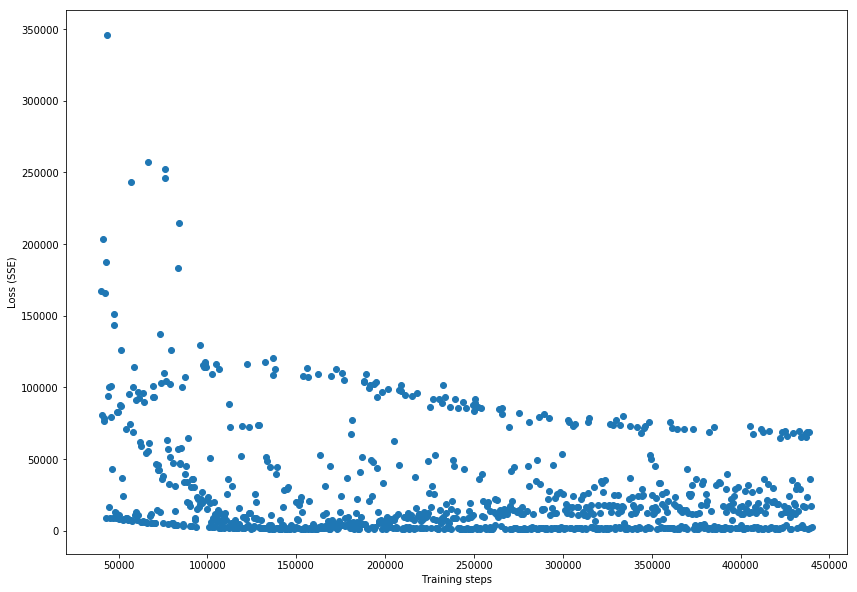

In [29]:
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps')
plt.ylabel('Loss (SSE)')
plt.show()


In [30]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,num_epochs=1,shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model2\model.ckpt-440000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

2.2108116667184357


#### since 2 layered NN has given lowest rmse of 2.21 use this for evaluation